<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 ¬∑ Aprenentatge autom√†tic ¬∑ PAC2</p>

<p style="margin: 0; text-align:right;">2024-1 ¬∑ M√†ster universitari en Ci√®ncia de dades (Data science)</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Inform√†tica, Multim√®dia i Telecomunicaci√≥</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

# PAC 3: M√®todes supervisats

En aquesta pr√†ctica veurem diferents m√®todes supervisats i intentarem optimitzar diverses m√®triques. Observarem com els diferents models classifiquen les observacions i amb quins obtenim un millor rendiment. Despr√©s aplicarem tot el que hem apr√®s fins ara a un nou conjunt de dades, simulant un cas pr√†ctic real.

1. [Exploraci√≥ d‚Äôalgorismes supervisats](#eje1) \
    1.1. [C√†rrega de dades](#eje10) \
    1.2. [Naive-Bayes](#eje11) \
    1.3. [An√†lisi Discriminant Lineal (LDA) i An√†lisi Discriminant Quadr√†tic (QDA)](#eje12) \
    1.4. [K ve√Øns m√©s propers (KNN)](#eje13) \
    1.5. [M√†quines de suport vectorial (SVM)](#eje14) \
    1.6. [Arbres de decisi√≥](#eje15) 
2. [Implementaci√≥ del cas pr√†ctic](#eje2)\
    2.1. [C√†rrega de dades](#eje20) \
    2.2. [An√†lisi Exploratori de Dades](#eje21) \
    2.3. [Preprocessament de Dades](#eje22) \
    2.4. [Modelitzaci√≥](#eje23) 


<u>Consideracions generals</u>:

- La soluci√≥ plantejada no pot utilitzar m√®todes, funcions o par√†metres declarats **_deprecated_** en futures versions, amb l‚Äôexcepci√≥ de la c√†rrega de dades com s‚Äôindica posteriorment.
- Aquesta PAC s‚Äôha de realitzar de forma **estrictament individual**. Qualsevol indici de c√≤pia ser√† penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluaci√≥ negativa de l‚Äôassignatura de forma √≠ntegra.
- √âs necessari que l‚Äôestudiant indiqui **totes les fonts** que ha utilitzat per a la realitzaci√≥ de la PAC. Si no √©s aix√≠, es considerar√† que l‚Äôestudiant ha com√®s plagi, sent penalitzat amb un suspens (D) i la possible avaluaci√≥ negativa de l‚Äôassignatura de forma √≠ntegra.

<u>Format del lliurament</u>:

- Alguns exercicis poden suposar diversos minuts d‚Äôexecuci√≥, per la qual cosa el lliurament s‚Äôha de fer en **format notebook** i en **format HTML**, on es vegi el codi, els resultats i els comentaris de cada exercici. Es pot exportar el notebook a HTML des del men√∫ File $\to$ Download as $\to$ HTML.
- Hi ha un tipus de cel¬∑la especial per albergar text. Aquest tipus de cel¬∑la us ser√† molt √∫til per respondre les diferents preguntes te√≤riques plantejades al llarg de l‚Äôactivitat. Per canviar el tipus de cel¬∑la a aquest tipus, al men√∫: Cell $\to$ Cell Type $\to$ Markdown.

<div class="alert alert-block alert-info">
    <strong>Nom i cognoms: Toni Vives Cabaleiro</strong>
</div>

In [1]:
import os
import shap
import copy
import tqdm
import torch
import pickle
import kagglehub
import umap

import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, train_test_split
from torcheval.metrics.functional import binary_f1_score, binary_accuracy, binary_auroc

%matplotlib inline

<a id='ej1'></a>
# 1. Exploraci√≥ d‚Äôalgorismes supervisats

## 1.1. C√†rrega de dades

El conjunt de dades Fashion MNIST proporcionat per Zalando consta de 70.000 imatges amb 10 classes diferents de roba repartides uniformement. No obstant aix√≤, per a aquesta pr√†ctica utilitzarem √∫nicament un subconjunt de 5.000 imatges que consisteix en 1.000 imatges de 5 classes diferents.

Les imatges tenen una resoluci√≥ de 28x28 p√≠xels en escala de grisos, per la qual cosa es poden representar utilitzant un vector de 784 posicions.

El seg√ºent codi carregar√† les 5.000 imatges a la variable `images` i les corresponents etiquetes (en forma num√®rica) a la variable `labels`. Podem comprovar que la c√†rrega ha estat correcta obtenint les dimensions d‚Äôaquestes dues variables.

In [2]:
with open("data.pickle", "rb") as f:
    data = pickle.load(f)
    
X = data["images"]
y = data["labels"]
n_classes = 5
labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat"]

print("Vector Image Dimensions: {}".format(X.shape))
print("Vector Label Dimensions: {}".format(y.shape))

Vector Image Dimensions: (5000, 784)
Vector Label Dimensions: (5000,)


Amb el codi seg√ºent podem veure un exemple d‚Äôimatge de cadascuna de les classes. Per fer-ho, reajustem el vector de 784 dimensions que representa cada imatge en una matriu de mida 28x28 i la transposem per mostrar-la:

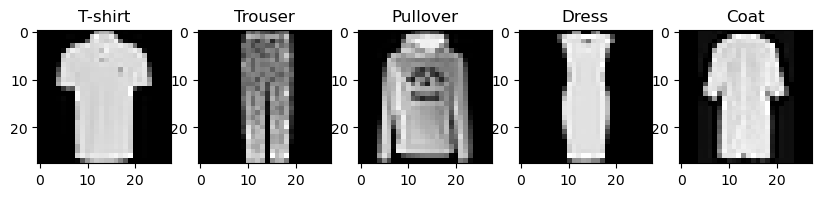

In [3]:
fig, ax = plt.subplots(1, n_classes, figsize=(10,10))

idxs = [np.where(y == i)[0] for i in range(n_classes)]

for i in range(n_classes):
    k = np.random.choice(idxs[i])
    ax[i].imshow(X[k].reshape(28, 28), cmap="gray")
    ax[i].set_title("{}".format(labels[i]))

plt.show()

<div class="alert alert-block alert-info">
    <strong>Implementaci√≥:</strong> 

Dividiu el _dataset_ en dos subconjunts, __*train*__ (80% de les dades) i __*test*__ (20% de les dades). Nombreu els conjunts com: X_train, X_test, y_train, y_test. Utilitzeu l‚Äôopci√≥ `random_state = 24`.
    
Podeu utilitzar la implementaci√≥ `train_test_split` de `sklearn`.
    
</div>

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)


<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
    A continuaci√≥ mostrem les separacions
</div>

In [5]:
print("Tamany del conjunt total: ", len(X))
print("Tamany del conjunt entrenament: ", len(X_train))
print("Tamany del conjunt test: ", len(X_test))

Tamany del conjunt total:  5000
Tamany del conjunt entrenament:  4000
Tamany del conjunt test:  1000


Per tal de visualitzar els resultats de cada algorisme supervisat, reduirem el dataset anterior a dues dimensions.

C:\Users\tvive\anaconda3\envs\environment_uoc20241pec3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


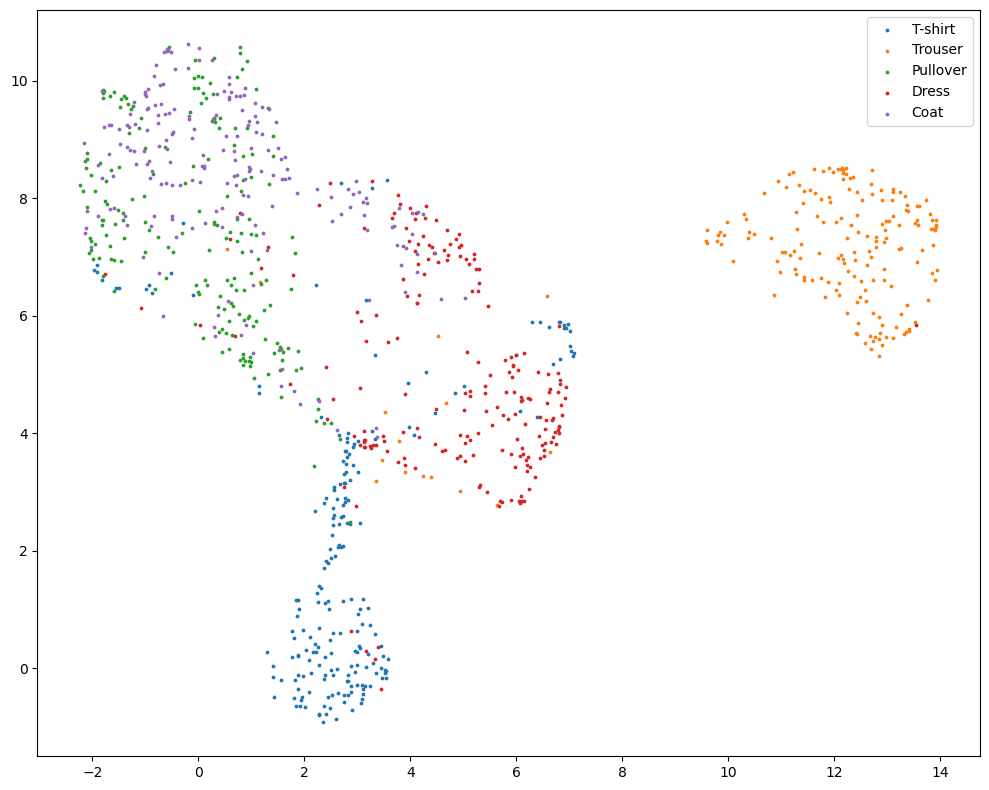

In [6]:
model = umap.UMAP(n_components=2, random_state=42)
model.fit(X_train)
X_train_projection = model.transform(X_train)
X_test_projection = model.transform(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(n_classes):
    ax.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], s=3, label=labels[i])
plt.legend()
plt.tight_layout()
plt.show()

Al llarg dels exercicis aprendrem a visualitzar gr√†ficament les fronteres de decisi√≥ que ens retornen els diferents models. Per fer-ho, utilitzarem la funci√≥ definida a continuaci√≥, que segueix els passos seg√ºents:

1. Crear una meshgrid amb els valors m√≠nim i m√†xim de 'x' i 'y'.
2. Predir el classificador amb els valors de la meshgrid.
3. Fer un reshape de les dades per obtenir el format corresponent.
4. Un cop fet aix√≤, ja podem generar el gr√†fic de les fronteres de decisi√≥ i afegir-hi els punts reals. Aix√≠ veurem les √†rees que el model considera que s√≥n d'una classe i les que considera que s√≥n d'una altra. Quan hi superposem els punts, podrem comprovar si els classifica correctament dins l'√†rea que els correspon.

In [7]:
# Create the meshgrid with the minimum and maximum values of the x and y axes
x_min, x_max = X_test_projection[:, 0].min() - 1, X_test_projection[:, 0].max() + 1
y_min, y_max = X_test_projection[:, 1].min() - 1, X_test_projection[:, 1].max() + 1

# Define the function that will visualize the decision boundary
def plot_decision_boundaries(model, X_test_projection, y_test):

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Prediction by using all values of the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Define the colors (one for each class)
    cmap_light = ListedColormap(['gainsboro','lightgreen','peachpuff','lightcyan', 'pink'])
    cmap_bold = ['grey','g','sandybrown','c','palevioletred']

    # Draw the borders
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Draw the points
    for i in range(n_classes):
         plt.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], 
                     s=3, label=labels[i], c=cmap_bold[i])
    plt.legend()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

<a id='ej11'></a>
## 1.2. Gaussian Na√Øve Bayes (1 punt)

El prop√≤sit d‚Äôaquest primer exercici √©s comprendre el funcionament de l‚Äôalgorisme Na√Øve-Bayes, un algorisme peculiar que es basa en el teorema de Bayes per calcular la probabilitat que una observaci√≥ pertanyi a cadascuna de les classes. Aquest model assumeix que les caracter√≠stiques d‚Äôentrada s√≥n independents entre si, fet que permet simplificar el c√†lcul de les probabilitats condicionals.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

1. **Entrena un Model de Na√Øve-Bayes:** Utilitza el conjunt de dades de _train_ per entrenar un model de Na√Øve-Bayes. Fes servir el classificador `GaussianNB` de la biblioteca `sklearn` per a aquest objectiu.

2. **Calcula l'_Accuracy_ del Model:** Un cop entrenat el model, calcula la seva precisi√≥ (_accuracy_) tant en el conjunt de _train_ com en el de _test_. Aix√≤ et permetr√† avaluar com de b√© est√† funcionant el teu model.

3. **Calcula la Matriu de Confusi√≥:** Utilitza el conjunt de _test_ per calcular la matriu de confusi√≥ del model. Aquesta matriu t‚Äôajudar√† a entendre millor els encerts i errors del teu classificador.

4. **Representa Gr√†ficament la Frontera de Decisi√≥:** Finalment, visualitza la frontera de decisi√≥ del model utilitzant el conjunt de _test_. Pots fer aix√≤ amb l‚Äôajuda de la funci√≥ `plot_decision_boundary` que ja has creat pr√®viament.

Per a realitzar aquests c√†lculs i visualitzacions, utilitza les funcions `accuracy_score` i `confusion_matrix` del paquet `metrics` de `sklearn`.

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Accuracy en el conjunt de train: 0.75
Accuracy en el conjunt de test: 0.73
Matriu de confusi√≥ (conjunt de test):
[[167   0  13  28   4]
 [  2 171   2  11   0]
 [ 11   0 156   0  27]
 [ 23   1   6 159  16]
 [  7   0 111  12  73]]


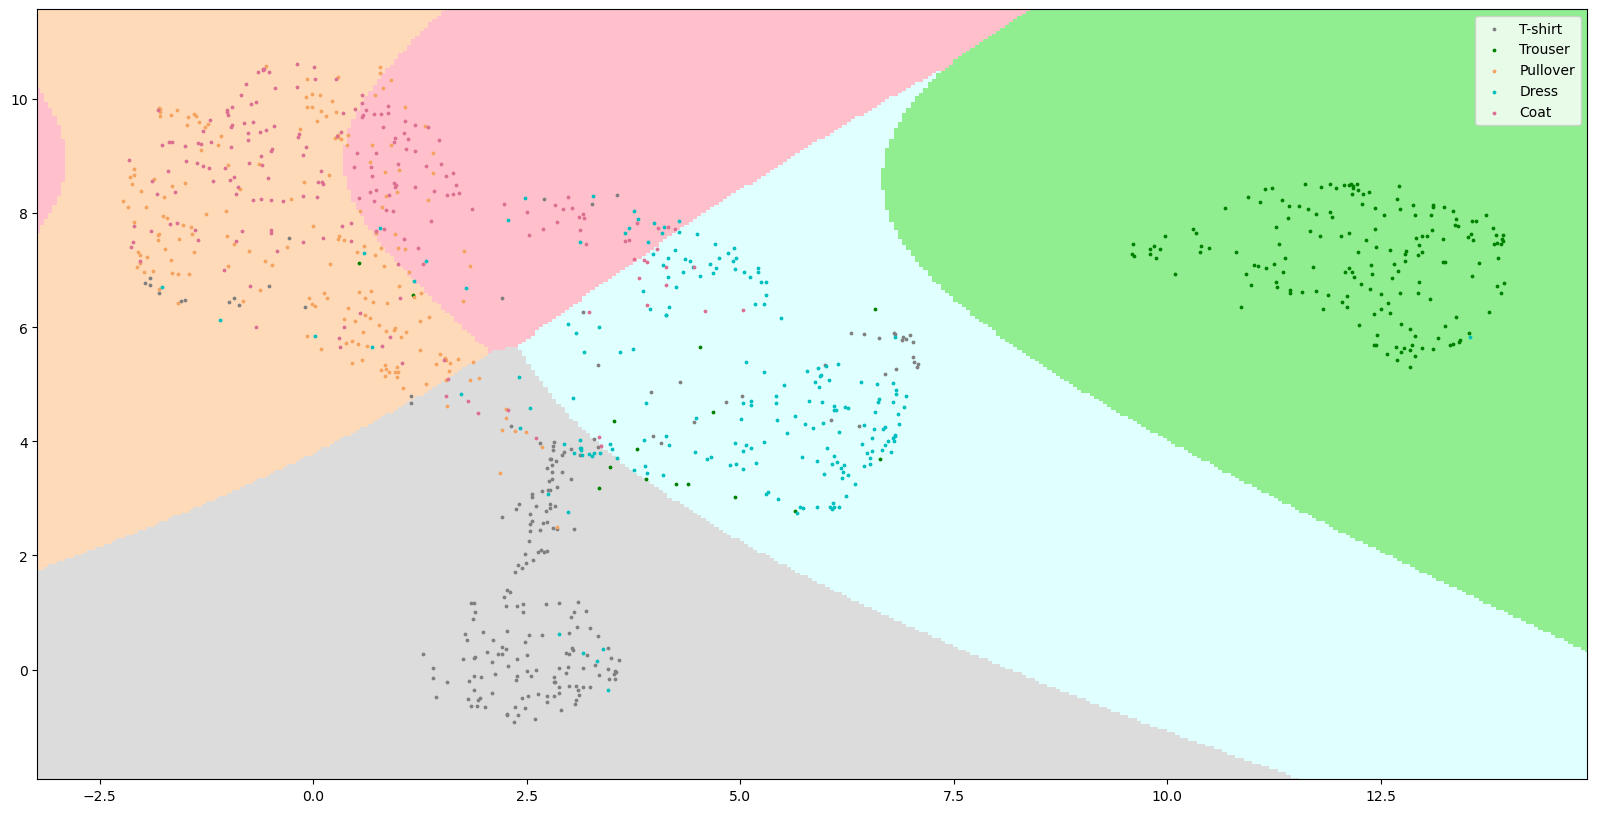

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Entrenar el model Gaussian Na√Øve Bayes amb les dades redu√Ødes
model_gnb = GaussianNB()
model_gnb.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l'accuracy amb les dades projectades
y_train_pred = model_gnb.predict(X_train_projection)
y_test_pred = model_gnb.predict(X_test_projection)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en el conjunt de train: {train_accuracy:.2f}")
print(f"Accuracy en el conjunt de test: {test_accuracy:.2f}")

# Matriu de confusi√≥
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriu de confusi√≥ (conjunt de test):")
print(conf_matrix)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(model_gnb, X_test_projection, y_test)


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong> 
  
An√†lisi de l'exercici.

   - Com s√≥n les fronteres de decisi√≥? T√© sentit que tinguin aquesta forma amb l'algorisme utilitzat?
   - Com s√≥n les prediccions obtingudes sobre el conjunt de test?
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>

Les fronteres s√≥n suaus i no complexes, ja que l'algorisme Gaussian Na√Øve Bayes assumeix que les dades segueixen una distribuci√≥ normal per a cada caracter√≠stica, i les classes es separen basant-se en probabilitats condicionals.

Aquest tipus de frontera t√© sentit per aquest algorisme perqu√® est√† dissenyat per treballar amb sup√≤sits de distribuci√≥ gaussiana, cosa que resulta en √†rees de decisi√≥ cont√≠nues.

En la matriu de confusi√≥ veiem que la classe 3 t√© una precisi√≥ alta, mentre que les classes com la 4 i la 5 mostren m√©s confusi√≥ amb altres classes.

L'algorisme aconsegueix un bon rendiment, ja que la precisi√≥ en el conjunt de test (0.73) √©s for√ßa propera a la precisi√≥ en el conjunt de train(0.75).

Analitzant conjunt de dades, no sembla que sigui molt √≤ptim doncs si b√© es cert que encapsula correctament la classe 3, les altres en els punts de uni√≥ te barreja de dades.

</div>

<a id='ej12'></a>
## 1.3 An√†lisi Discriminant Lineal (LDA) i An√†lisi Discriminant Quadr√†tic (QDA) (1 punt)

Ara analitzar√†s dos algorismes que es basen en la transformaci√≥ lineal de les caracter√≠stiques d‚Äôentrada per maximitzar la separaci√≥ entre les classes. Aquests models operen sota la suposici√≥ que les caracter√≠stiques segueixen una distribuci√≥ gaussiana. Aix√≤ et permetr√† calcular les probabilitats condicionals de cada classe. Amb aquests c√†lculs, assignar√†s a cada observaci√≥ la classe que presenti la probabilitat condicional m√©s gran.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Segueix aquests passos amb el dataset d‚Äôentrenament (_train_):    
    
1. Entrena un model d‚ÄôAn√†lisi Discriminant Lineal (LDA) utilitzant el classificador `LinearDiscriminantAnalysis` de `sklearn`.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.

Aquestes accions t‚Äôajudaran a avaluar l‚Äôefic√†cia del model LDA en el teu conjunt de dades i a entendre millor com classifica les observacions.

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (LDA): 0.76
Test Accuracy (LDA): 0.74
Matriu de confusi√≥ (LDA - conjunt de test):
[[164   0  14  30   4]
 [  3 171   2  10   0]
 [  9   0 135   0  50]
 [ 19   1   6 166  13]
 [  4   0  81  17 101]]


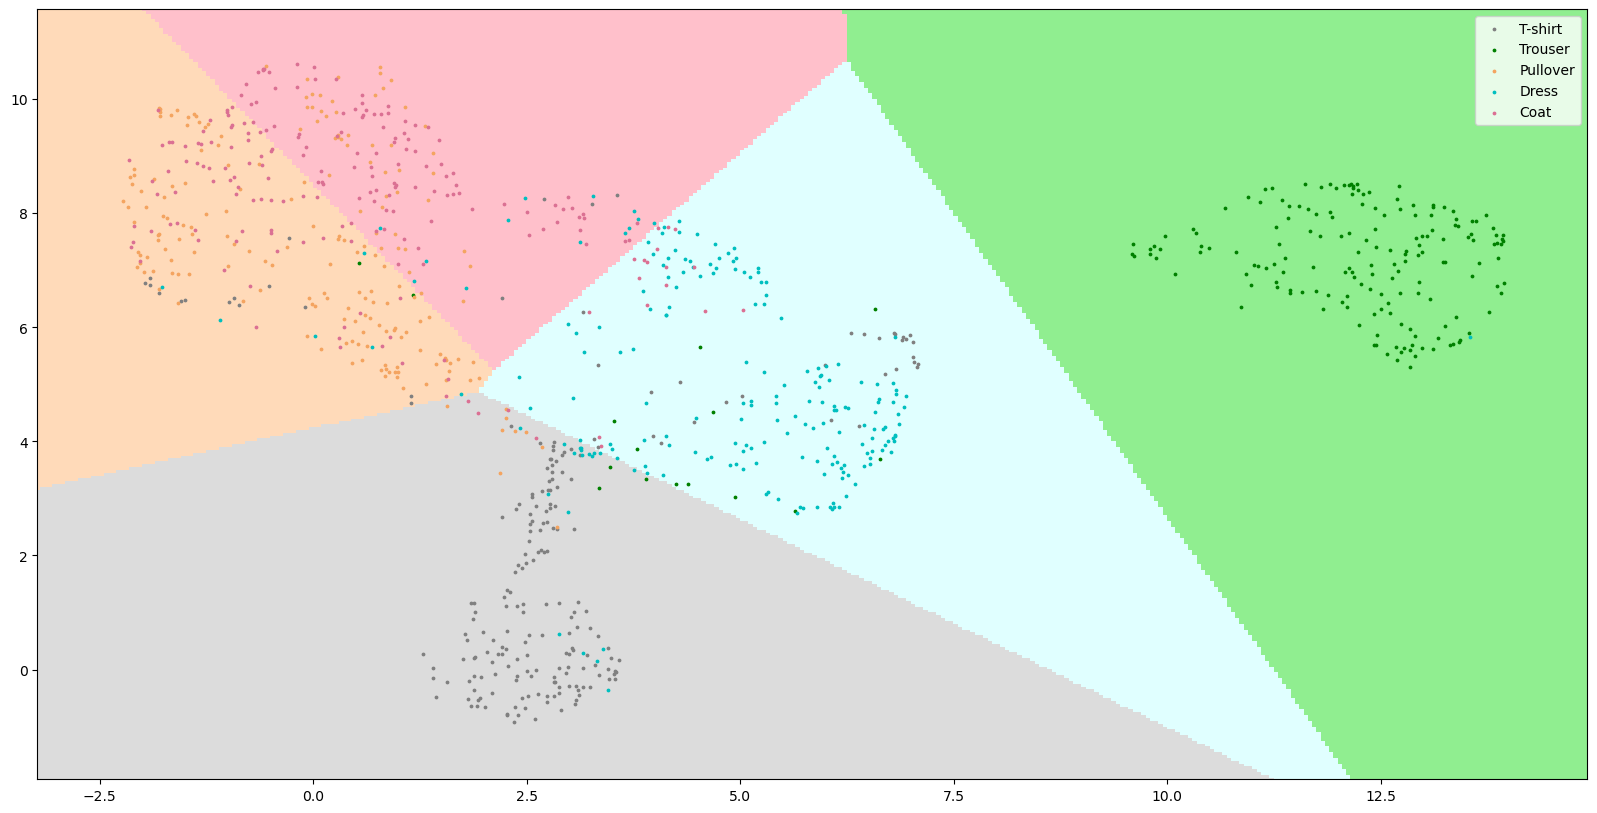

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Entrenar el model d‚ÄôAn√†lisi Discriminant Lineal (LDA)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l‚Äôaccuracy
y_train_pred_lda = model_lda.predict(X_train_projection)
y_test_pred_lda = model_lda.predict(X_test_projection)

train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)

print(f"Train Accuracy (LDA): {train_accuracy_lda:.2f}")
print(f"Test Accuracy (LDA): {test_accuracy_lda:.2f}")

# Matriu de confusi√≥
conf_matrix_lda = confusion_matrix(y_test, y_test_pred_lda)
print("Matriu de confusi√≥ (LDA - conjunt de test):")
print(conf_matrix_lda)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(model_lda, X_test_projection, y_test)


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. Observa les fronteres de decisi√≥ que has generat. Reflexiona sobre la seva forma: s‚Äôajusten al que esperaries de l‚Äôalgorisme d‚ÄôAn√†lisi Discriminant Lineal (LDA)? Considera la naturalesa lineal de l‚Äôalgorisme i com aix√≤ influeix en la forma de les fronteres.
2. Avalua les prediccions realitzades sobre el conjunt de test. Analitza la seva precisi√≥ i com es distribueixen respecte a les fronteres de decisi√≥. S√≥n coherents aquestes prediccions amb el que observes a les fronteres de decisi√≥?

Aquestes reflexions et permetran comprendre millor l‚Äôefectivitat del model LDA i la seva adequaci√≥ per al conjunt de dades amb qu√® est√†s treballant.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Realitza els passos seg√ºents amb el dataset d‚Äôentrenament (_train_):

1. Entrena un model d‚ÄôAn√†lisi Discriminant Quadr√†tic (QDA) utilitzant el classificador `QuadraticDiscriminantAnalysis` de `sklearn`.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com en les de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.

Aquests passos t‚Äôajudaran a avaluar com el model QDA es comporta amb el teu conjunt de dades i a entendre la seva capacitat per classificar i diferenciar entre les classes.

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (QDA): 0.74
Test Accuracy (QDA): 0.72
Matriu de confusi√≥ (QDA - conjunt de test):
[[166   0  14  28   4]
 [  3 171   2  10   0]
 [  8   0 139   0  47]
 [ 27   1   7 156  14]
 [  6   0  95  13  89]]


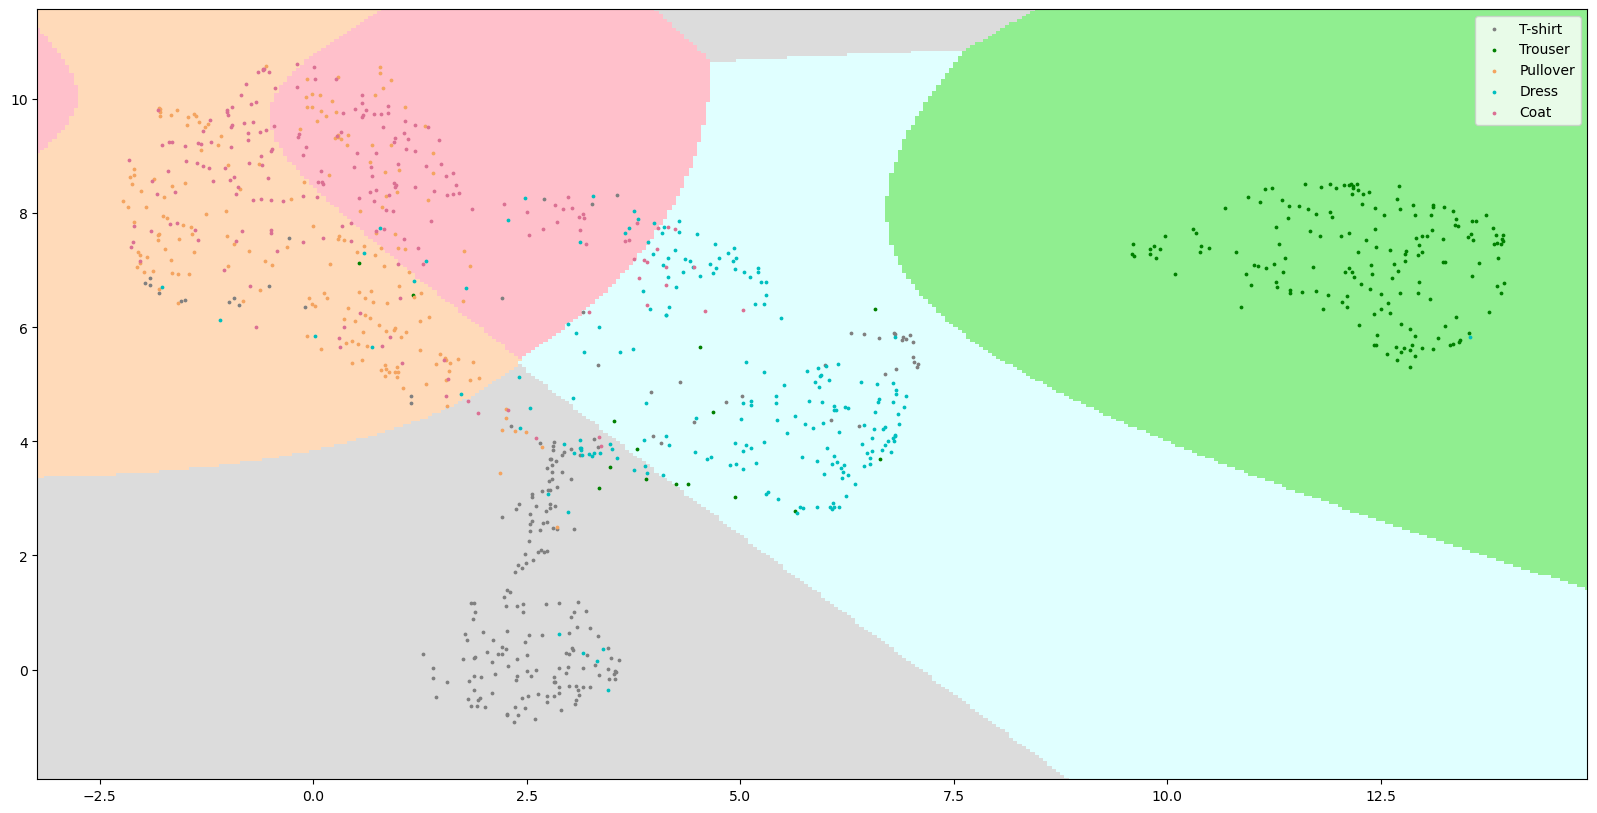

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Entrenar el model d'An√†lisi Discriminant Quadr√†tic (QDA)
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l'accuracy
y_train_pred_qda = model_qda.predict(X_train_projection)
y_test_pred_qda = model_qda.predict(X_test_projection)

train_accuracy_qda = accuracy_score(y_train, y_train_pred_qda)
test_accuracy_qda = accuracy_score(y_test, y_test_pred_qda)

print(f"Train Accuracy (QDA): {train_accuracy_qda:.2f}")
print(f"Test Accuracy (QDA): {test_accuracy_qda:.2f}")

# Matriu de confusi√≥
conf_matrix_qda = confusion_matrix(y_test, y_test_pred_qda)
print("Matriu de confusi√≥ (QDA - conjunt de test):")
print(conf_matrix_qda)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(model_qda, X_test_projection, y_test)


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. Examina les fronteres de decisi√≥ que has generat. Reflexiona sobre la seva forma: √©s coherent amb el que esperaries de l‚Äôalgorisme d‚ÄôAn√†lisi Discriminant Quadr√†tic (QDA)? Considera com la naturalesa quadr√†tica de l‚Äôalgorisme podria influir en la forma d‚Äôaquestes fronteres.
2. Avalua les prediccions realitzades sobre el conjunt de test. Observa la seva precisi√≥ i com es distribueixen en relaci√≥ amb les fronteres de decisi√≥. S√≥n aquestes prediccions consistents amb les fronteres observades?
3. Reflexiona sobre les difer√®ncies entre els algorismes LDA i QDA. En qu√® es diferencien en termes de sup√≤sits, enfocament i resultats en les teves dades?

Aquesta an√†lisi et permetr√† comprendre les caracter√≠stiques i l‚Äôefic√†cia de tots dos models, LDA i QDA, i com s‚Äôapliquen al teu conjunt de dades.

</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<a id='ej13'></a>
## 1.4. KNN (1 punt)

En aquest punt, entendr√†s el funcionament de l‚Äôalgorisme KNN (K-Nearest-Neighbor), que es basa en la proximitat dels punts de dades en un espai de caracter√≠stiques. Analitzar√†s els seus avantatges i desavantatges, i comprendr√†s com els par√†metres que el componen influeixen en el seu comportament.

KNN √©s un algorisme de tipus supervisat basat en inst√†ncia. Aix√≤ significa:

- Supervisat: El teu conjunt de dades d‚Äôentrenament est√† etiquetat amb la classe o resultat esperat.
- Basat en inst√†ncia (_Lazy Learning_): L‚Äôalgorisme no apr√®n expl√≠citament un model, com en la Regressi√≥ Log√≠stica o els arbres de decisi√≥. En canvi, memoritza les inst√†ncies d‚Äôentrenament i les utilitza com a "coneixement" en la fase de predicci√≥.

Per entendre com funciona KNN, segueix aquests passos:

1. Calcula la dist√†ncia entre l‚Äô√≠tem a classificar i la resta d‚Äô√≠tems del dataset d‚Äôentrenament.
2. Selecciona els "k" elements m√©s propers, √©s a dir, aquells amb la menor dist√†ncia, segons el tipus de dist√†ncia que utilitzis (euclidiana, cosinus, manhattan, etc).
3. Realitza una "votaci√≥ de majoria" entre els k punts seleccionats: la classe que predomini en aquests punts decidir√† la classificaci√≥ final de l‚Äô√≠tem analitzat.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Realitza els passos seg√ºents amb el dataset d‚Äôentrenament (_train_):

1. Entrena un classificador KNN amb l‚Äôhiperpar√†metre `n_neighbors=2` utilitzant el classificador `KNeighborsClassifier` de `sklearn`.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com en les de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.

Si en entrenar el classificador apareix un av√≠s (_warning_) i vols ignorar-lo, executa el codi seg√ºent abans de l‚Äôentrenament:

`import warnings`  
`warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)`

Aix√≤ et permetr√† avaluar l‚Äôefectivitat del model KNN amb `n_neighbors=2` en el teu conjunt de dades i entendre com es comporta en termes de classificaci√≥ i separaci√≥ de classes.

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (KNN): 0.88
Test Accuracy (KNN): 0.73
Matriu de confusi√≥ (KNN - conjunt de test):
[[186   1   8  12   5]
 [  3 173   1   9   0]
 [  9   6 140   4  35]
 [ 26   9  19 142   9]
 [  7   3  92   9  92]]


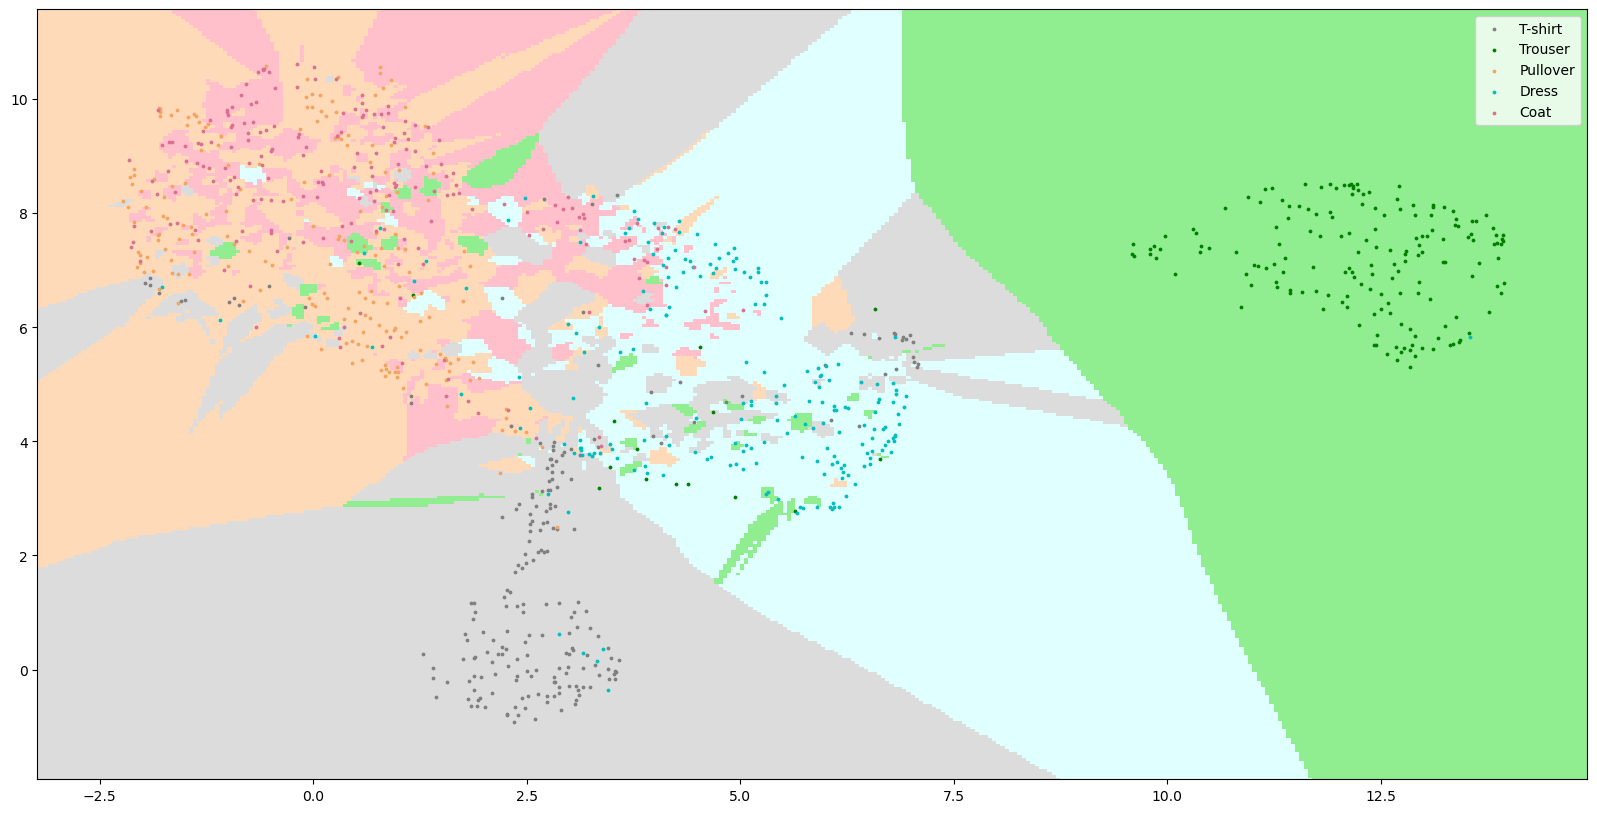

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el model KNN amb n_neighbors=2
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l‚Äôaccuracy
y_train_pred_knn = model_knn.predict(X_train_projection)
y_test_pred_knn = model_knn.predict(X_test_projection)

train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"Train Accuracy (KNN): {train_accuracy_knn:.2f}")
print(f"Test Accuracy (KNN): {test_accuracy_knn:.2f}")

# Matriu de confusi√≥
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
print("Matriu de confusi√≥ (KNN - conjunt de test):")
print(conf_matrix_knn)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(model_knn, X_test_projection, y_test)


En el model que has entrenat, has fixat el par√†metre `n_neighbors` de manera arbitr√†ria. Tanmateix, √©s possible que amb un altre valor obtinguis una millor predicci√≥. Per trobar el valor √≤ptim dels par√†metres d‚Äôun model (_hyperparameter tuning_), sovint s‚Äôutilitza una cerca de graella (_grid search_). Aix√≤ implica entrenar un model per a cada combinaci√≥ possible d‚Äôhiperpar√†metres i avaluar-lo mitjan√ßant validaci√≥ creuada (_cross validation_) amb 5 particions estratificades. Posteriorment, seleccionar√†s la combinaci√≥ d‚Äôhiperpar√†metres que hagi obtingut els millors resultats.

En aquest cas, et centrar√†s en optimitzar un sol hiperpar√†metre:

- ùëò: el nombre de ve√Øns que es consideren per classificar un nou exemple. Has de provar amb tots els valors entre 1 i 20.

Realitza aquest proc√©s per identificar el nombre √≤ptim de ve√Øns, fet que et permetr√† millorar la precisi√≥ de les teves prediccions amb el model KNN.

<div class="alert alert-block alert-info">
    <strong>Implementaci√≥:</strong>

Per calcular el valor √≤ptim de l‚Äôhiperpar√†metre _k_ (`n_neighbors`), has de realitzar una cerca de graella amb validaci√≥ creuada. Aquest proc√©s t‚Äôajudar√† a trobar el valor √≤ptim de _k_. Per a cada valor, calcula la seva mitjana i desviaci√≥ est√†ndard. Despr√©s, implementa un _heatmap_ per visualitzar la precisi√≥ segons els diferents valors de l‚Äôhiperpar√†metre.

Utilitza el m√≤dul `GridSearchCV` de `sklearn` per calcular el millor hiperpar√†metre. Per a la visualitzaci√≥ del _heatmap_, fes servir la biblioteca `Seaborn`.

Aquests passos et permetran identificar de manera efectiva i visual el valor de _k_ que maximitza la precisi√≥ del teu model KNN.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Millor valor de k: 7
Millor precisi√≥ amb validaci√≥ creuada: 0.81


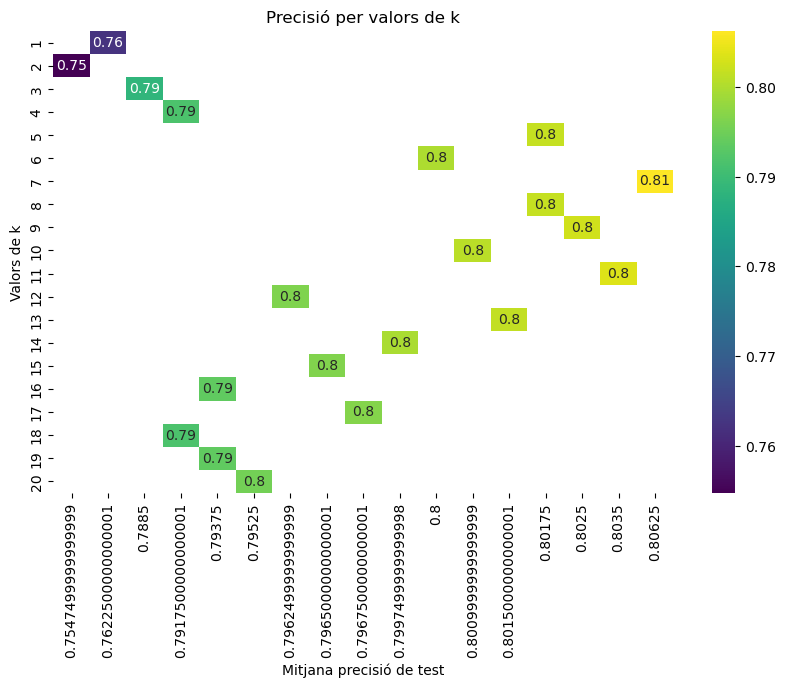

In [12]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd

# Definir l'espai d'hiperpar√†metres per a la cerca
param_grid = {'n_neighbors': range(1, 21)}

# Configurar el model i la cerca de graella amb validaci√≥ creuada
model_knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_projection, y_train)

# Obtenir els resultats de la cerca
results = pd.DataFrame(grid_search.cv_results_)

# Identificar el millor valor de k
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Millor valor de k: {best_k}")
print(f"Millor precisi√≥ amb validaci√≥ creuada: {best_score:.2f}")

# Crear un heatmap de precisi√≥
pivot_data = results.pivot(index='param_n_neighbors', columns='mean_test_score', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='viridis', cbar=True)
plt.title("Precisi√≥ per valors de k")
plt.xlabel("Mitjana precisi√≥ de test")
plt.ylabel("Valors de k")
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Segueix aquests passos amb el dataset d‚Äôentrenament (_train_):

1. Entrena un classificador KNN utilitzant el millor hiperpar√†metre que hagis trobat.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com en les de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.

Aquest proc√©s et permetr√† veure com l‚Äôhiperpar√†metre √≤ptim que has identificat millora l‚Äôefic√†cia del teu model KNN en la classificaci√≥ de les dades.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (Best KNN): 0.84
Test Accuracy (Best KNN): 0.79
Matriu de confusi√≥ (Best KNN - conjunt de test):
[[182   0   9  17   4]
 [  3 171   0  10   2]
 [  6   0 128   0  60]
 [ 11   1   9 168  16]
 [  1   0  50   9 143]]


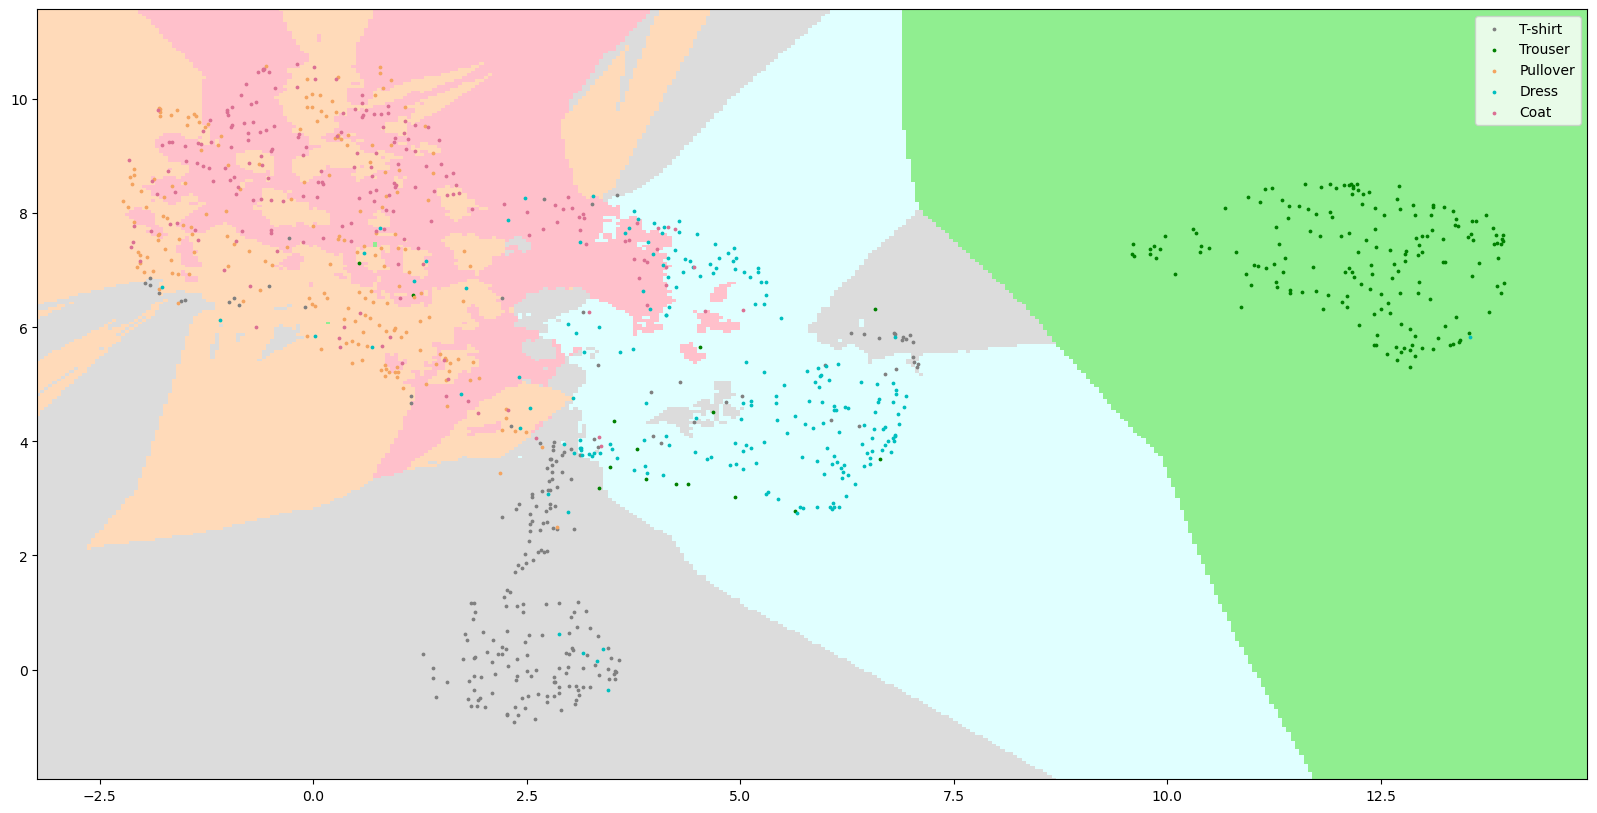

In [13]:
# Entrenar el model KNN amb el millor hiperpar√†metre trobat
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l‚Äôaccuracy
y_train_pred_best_knn = best_knn.predict(X_train_projection)
y_test_pred_best_knn = best_knn.predict(X_test_projection)

train_accuracy_best_knn = accuracy_score(y_train, y_train_pred_best_knn)
test_accuracy_best_knn = accuracy_score(y_test, y_test_pred_best_knn)

print(f"Train Accuracy (Best KNN): {train_accuracy_best_knn:.2f}")
print(f"Test Accuracy (Best KNN): {test_accuracy_best_knn:.2f}")

# Matriu de confusi√≥
conf_matrix_best_knn = confusion_matrix(y_test, y_test_pred_best_knn)
print("Matriu de confusi√≥ (Best KNN - conjunt de test):")
print(conf_matrix_best_knn)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(best_knn, X_test_projection, y_test)


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. Comenta els resultats obtinguts en la cerca del millor hiperpar√†metre. Reflexiona sobre com ha variat el rendiment del model amb els diferents valors de `n_neighbors`.
2. Analitza com es visualitza gr√†ficament el canvi del valor de `n_neighbors`. Observes alguna tend√®ncia o patr√≥ clar? √âs coherent aquesta difer√®ncia entre els dos gr√†fics quan canvia el par√†metre?
3. Examina les fronteres de decisi√≥ que has generat. T√© sentit la forma d‚Äôaquestes fronteres donat l‚Äôalgorisme KNN utilitzat? Pensa en com l‚Äôelecci√≥ del nombre de ve√Øns influeix en la forma de la frontera.
4. Avalua les prediccions realitzades sobre el conjunt de test. Observa la seva precisi√≥ i com es distribueixen en relaci√≥ amb les fronteres de decisi√≥. S√≥n aquestes prediccions consistents amb el que observes a les fronteres de decisi√≥?

Aquesta an√†lisi t‚Äôajudar√† a comprendre l‚Äôefic√†cia del model KNN amb diferents configuracions de `n_neighbors` i el seu impacte en la classificaci√≥ de les dades.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<a id='ej14'></a>
## 1.5. SVM (1 punt)

En aquesta secci√≥, explorar√†s les M√†quines de Vectors de Suport (SVM), que es basen en el concepte del _Maximal Margin Classifier_ i l‚Äôhiperpl√†.

Un hiperpl√† en un espai p-dimensional es defineix com un subespai pla i af√≠ de dimensions p-1. En dues dimensions, √©s una recta; en tres, un pla convencional. Per a dimensions majors a tres, encara que no sigui intu√Øtiu de visualitzar, el concepte es mant√©.

Quan els casos s√≥n perfectament separables de manera lineal, sorgeixen infinits possibles hiperplans. Per seleccionar el classificador √≤ptim, utilitza el concepte de _maximal margin hyperplane_, l‚Äôhiperpl√† que es troba m√©s allunyat de totes les observacions d‚Äôentrenament. Aquest es defineix calculant la dist√†ncia perpendicular m√≠nima (marge) de les observacions a un hiperpl√†. L‚Äôhiperpl√† √≤ptim √©s aquell que maximitza aquest marge.

En el proc√©s d‚Äôoptimitzaci√≥, has de tenir en compte que nom√©s les observacions al marge o que el violen (vectors suport) influeixen en l‚Äôhiperpl√†. Aquests vectors suport s√≥n els que defineixen el classificador.

#### Els _kernels_ en SVM

En situacions on no pots trobar un hiperpl√† que separi dues classes, √©s a dir, quan les classes no s√≥n linealment separables, pots utilitzar el truc del nucli (_kernel trick_). Aquest m√®tode et permet treballar en una dimensi√≥ nova on √©s possible trobar un hiperpl√† per separar les classes.

Igual que amb el KNN, les SVM tamb√© depenen de diversos hiperpar√†metres. En aquest cas, et centrar√†s en optimitzar dos hiperpar√†metres:

1. **C**: la regularitzaci√≥, que √©s el valor de penalitzaci√≥ dels errors en la classificaci√≥. Aquest valor indica el comprom√≠s entre obtenir l‚Äôhiperpl√† amb el marge m√©s gran possible i classificar correctament el m√†xim nombre d‚Äôexemples. Has de provar els valors seg√ºents: 0.01, 0.1, 1, 10, 50, 100 i 200.
   
2. **Gamma**: un coeficient que multiplica la dist√†ncia entre dos punts en el kernel radial. En termes simples, com m√©s petit sigui gamma, m√©s influ√®ncia tindran dos punts propers. Has de provar els valors: 0.001, 0.01, 0.1, 1 i 10.

Per validar el rendiment de l‚Äôalgorisme amb cada combinaci√≥ d‚Äôhiperpar√†metres, utilitza la validaci√≥ creuada (_cross-validation_) amb 4 particions estratificades.

<div class="alert alert-block alert-info">
    <strong>Implementaci√≥:</strong>


1. Calcula el valor √≤ptim dels hiperpar√†metres _C_ i _gamma_ utilitzant una cerca de graella amb validaci√≥ creuada. Aquest proc√©s t‚Äôajudar√† a trobar els valors √≤ptims.
2. Per a cada combinaci√≥ de valors, calcula la seva mitjana i desviaci√≥ est√†ndard.
3. Fes un _heatmap_ per visualitzar la precisi√≥ segons els diferents valors dels hiperpar√†metres.

Utilitza el m√≤dul `GridSearchCV` de `sklearn` per calcular els millors hiperpar√†metres amb el classificador SVC (de `SVM` de `sklearn`). Per a la visualitzaci√≥ del _heatmap_, fes servir la biblioteca `Seaborn`.

Aquests passos et permetran identificar de manera efectiva i visual els valors de _C_ i _gamma_ que maximitzen la precisi√≥ del teu model SVM.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Millors hiperpar√†metres: {'C': 1, 'gamma': 10}
Millor precisi√≥ amb validaci√≥ creuada: 0.81


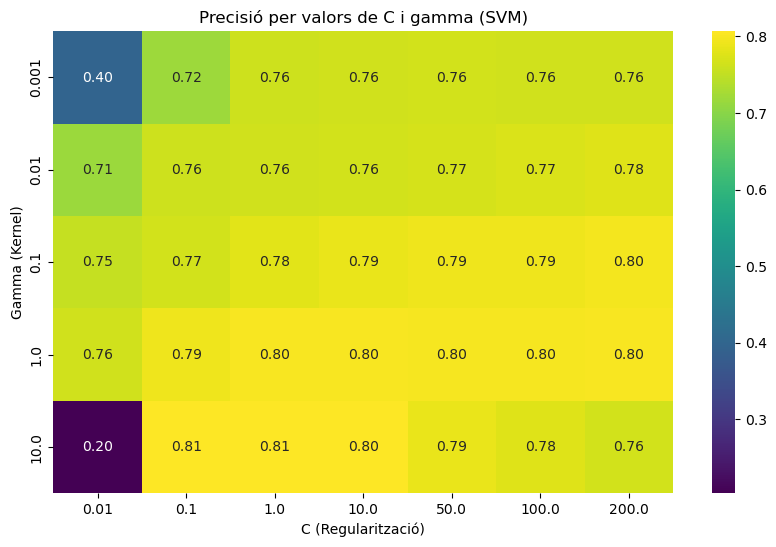

In [14]:
from sklearn.svm import SVC

# Definir l'espai d'hiperpar√†metres per a la cerca
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 200],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Configurar el model SVM i la cerca de graella amb validaci√≥ creuada
model_svm = SVC(kernel='rbf')
grid_search_svm = GridSearchCV(
    estimator=model_svm,
    param_grid=param_grid_svm,
    cv=4,
    scoring='accuracy',
    return_train_score=True
)
grid_search_svm.fit(X_train_projection, y_train)

# Obtenir els resultats de la cerca
results_svm = pd.DataFrame(grid_search_svm.cv_results_)

# Identificar els millors hiperpar√†metres
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Millors hiperpar√†metres: {best_params_svm}")
print(f"Millor precisi√≥ amb validaci√≥ creuada: {best_score_svm:.2f}")

# Crear un heatmap per visualitzar la precisi√≥
pivot_data_svm = results_svm.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data_svm, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title("Precisi√≥ per valors de C i gamma (SVM)")
plt.xlabel("C (Regularitzaci√≥)")
plt.ylabel("Gamma (Kernel)")
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Realitza els passos seg√ºents amb el dataset d‚Äôentrenament (_train_):

1. Entrena un model SVM utilitzant la millor combinaci√≥ de par√†metres que hagis trobat.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com en les de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.

Aquest proc√©s et permetr√† veure com la millor combinaci√≥ de par√†metres millora l‚Äôefic√†cia del teu model SVM en la classificaci√≥ de les dades.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (Best SVM): 0.84
Test Accuracy (Best SVM): 0.79
Matriu de confusi√≥ (Best SVM - conjunt de test):
[[176   0  10  21   5]
 [  1 171   0  12   2]
 [  4   0 130   0  60]
 [ 14   1   8 166  16]
 [  1   0  49   9 144]]


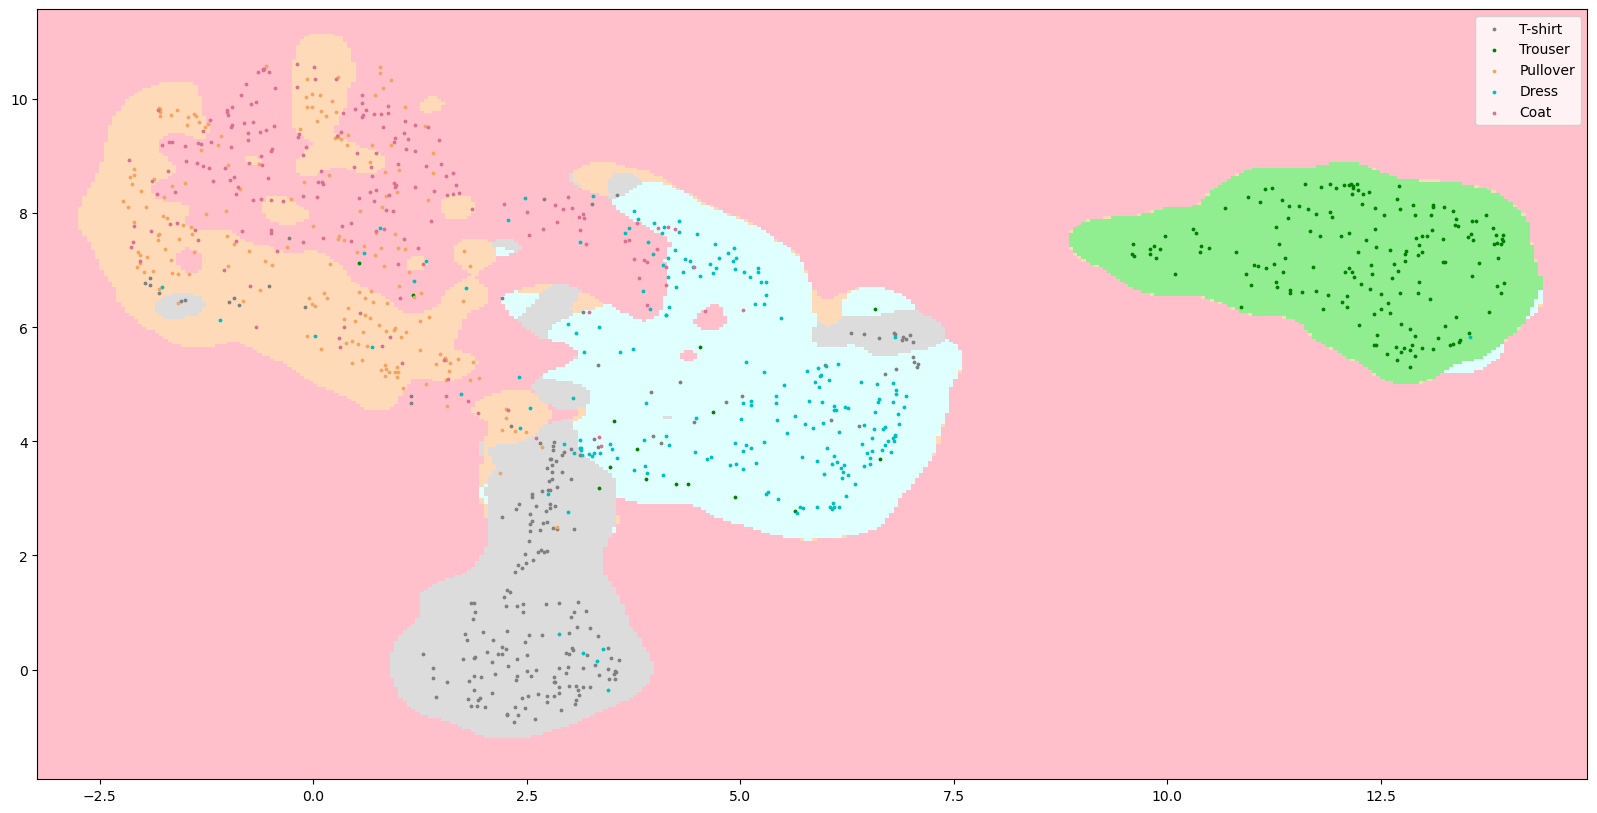

In [15]:
best_C = 1  
best_gamma = 10  

# Entrenar el model SVM amb els millors hiperpar√†metres
best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l‚Äôaccuracy
y_train_pred_svm = best_svm.predict(X_train_projection)
y_test_pred_svm = best_svm.predict(X_test_projection)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"Train Accuracy (Best SVM): {train_accuracy_svm:.2f}")
print(f"Test Accuracy (Best SVM): {test_accuracy_svm:.2f}")

# Matriu de confusi√≥
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
print("Matriu de confusi√≥ (Best SVM - conjunt de test):")
print(conf_matrix_svm)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(best_svm, X_test_projection, y_test)


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. Comenta els resultats obtinguts en la cerca dels millors hiperpar√†metres. Reflexiona sobre com ha variat el rendiment del model SVM amb els diferents valors de _C_ i _gamma_. Considera si els valors √≤ptims trobats tenen sentit en el context del teu conjunt de dades.
2. Examina les fronteres de decisi√≥ que has generat amb el model SVM. √âs coherent la forma d‚Äôaquestes fronteres amb el que esperaries de l‚Äôalgorisme utilitzat? Pensa en com la combinaci√≥ d‚Äôhiperpar√†metres seleccionats podria influir en la forma de les fronteres.
3. Avalua les prediccions realitzades sobre el conjunt de test. Observa la seva precisi√≥ i com es distribueixen en relaci√≥ amb les fronteres de decisi√≥. S√≥n aquestes prediccions consistents amb el que observes a les fronteres de decisi√≥?

Aquesta an√†lisi t‚Äôajudar√† a comprendre l‚Äôefic√†cia del model SVM amb els hiperpar√†metres seleccionats i el seu impacte en la classificaci√≥ de les dades.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<a id='ej15'></a>
## 1.6. Arbres de decisi√≥ (1 punt)

En aquesta secci√≥, explorar√†s els arbres de decisi√≥, models predictius que es basen en regles bin√†ries (s√≠/no) per classificar les observacions segons els seus atributs i predir el valor de la variable resposta. Aquests arbres poden ser classificadors, com en el teu exemple, o regressors per predir variables cont√≠nues.

#### Construcci√≥ d‚Äôun Arbre

Per construir un arbre, segueix l‚Äôalgorisme de *recursive binary splitting*:

1. Comen√ßa a la part superior de l‚Äôarbre, on totes les observacions pertanyen a la mateixa regi√≥.
2. Identifica tots els possibles punts de tall per a cadascun dels predictors. Aquests punts de tall s√≥n els diferents nivells dels predictors.
3. Avalua les possibles divisions per a cada predictor utilitzant una mesura espec√≠fica. En els classificadors, aquestes mesures poden ser el *classification error rate*, l‚Äô√≠ndex Gini, l‚Äôentropia o el chi-square.

Comprendre aquests passos t‚Äôajudar√† a entendre com els arbres de decisi√≥ creen divisions bin√†ries per classificar les dades i com es poden aplicar tant per a classificaci√≥ com per a regressi√≥.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥n:</strong>

Sigue estos pasos:

1. Con el dataset de entrenamiento (_train_), entrena un √°rbol de decisi√≥n utilizando el clasificador `DecisionTreeClassifier` de la biblioteca `tree` de `sklearn`.
2. Calcula el _accuracy_ (precisi√≥n) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusi√≥n utilizando los datos de _test_.
4. Representa gr√°ficamente la frontera de decisi√≥n con los datos de _test_.
5. Representa el √°rbol de decisi√≥n. Puedes utilizar el comando `plot.tree` de la biblioteca `tree` de `sklearn`.

Estos pasos te permitir√°n evaluar c√≥mo el √°rbol de decisi√≥n se comporta en tu conjunto de datos, tanto en t√©rminos de clasificaci√≥n como en su representaci√≥n visual."
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (Pruned Decision Tree): 1.00
Test Accuracy (Pruned Decision Tree): 0.73
Matriu de confusi√≥ (Pruned Decision Tree - conjunt de test):
[[173   3  10  19   7]
 [  2 169   2  11   2]
 [  6   1 117   4  66]
 [ 15   3  12 158  17]
 [  4   1  75  10 113]]


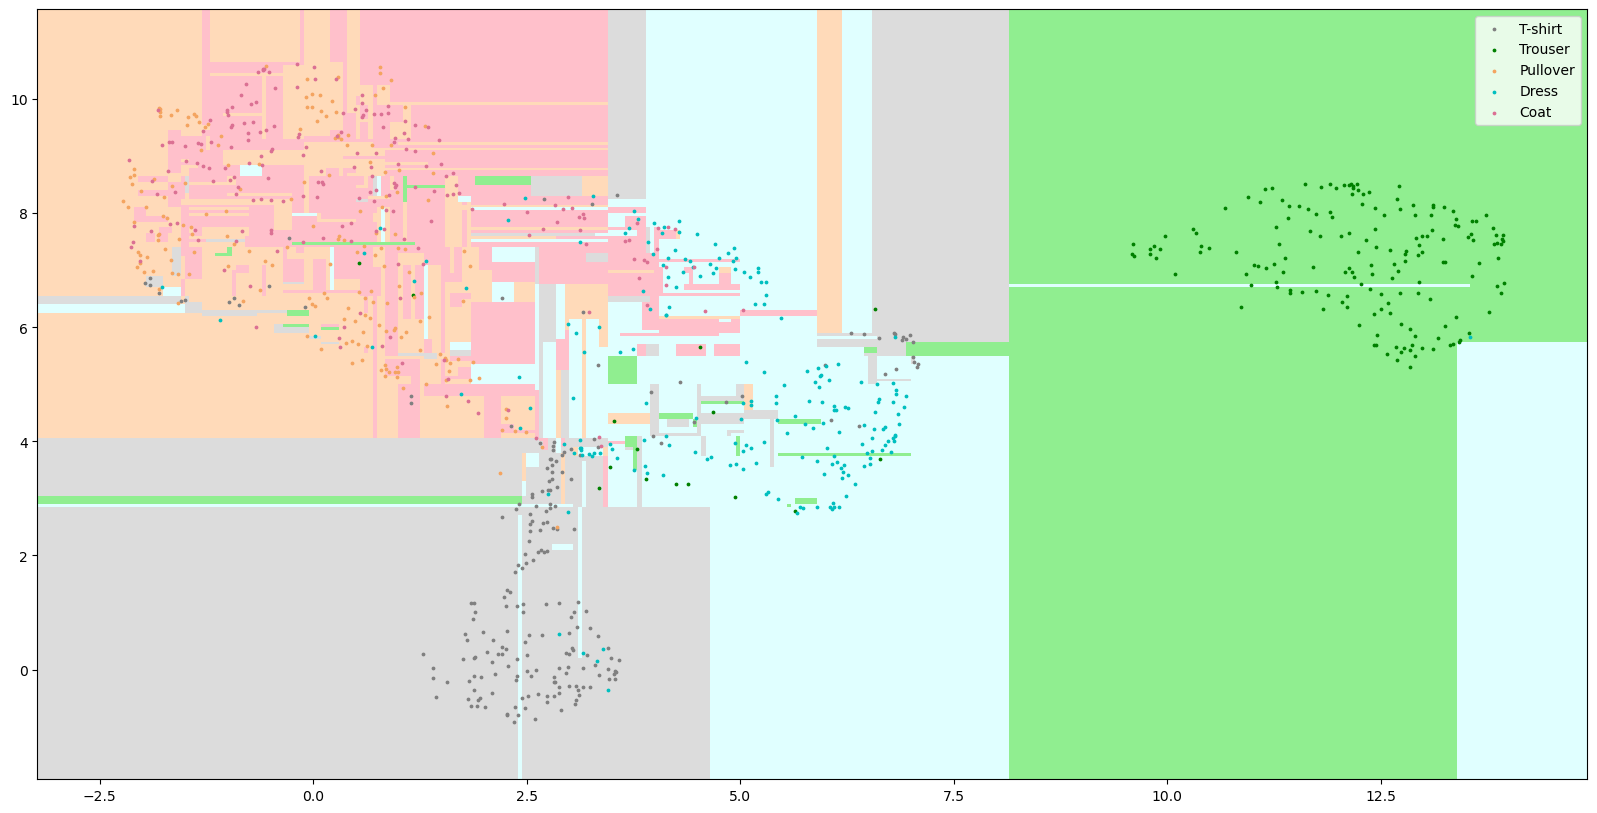

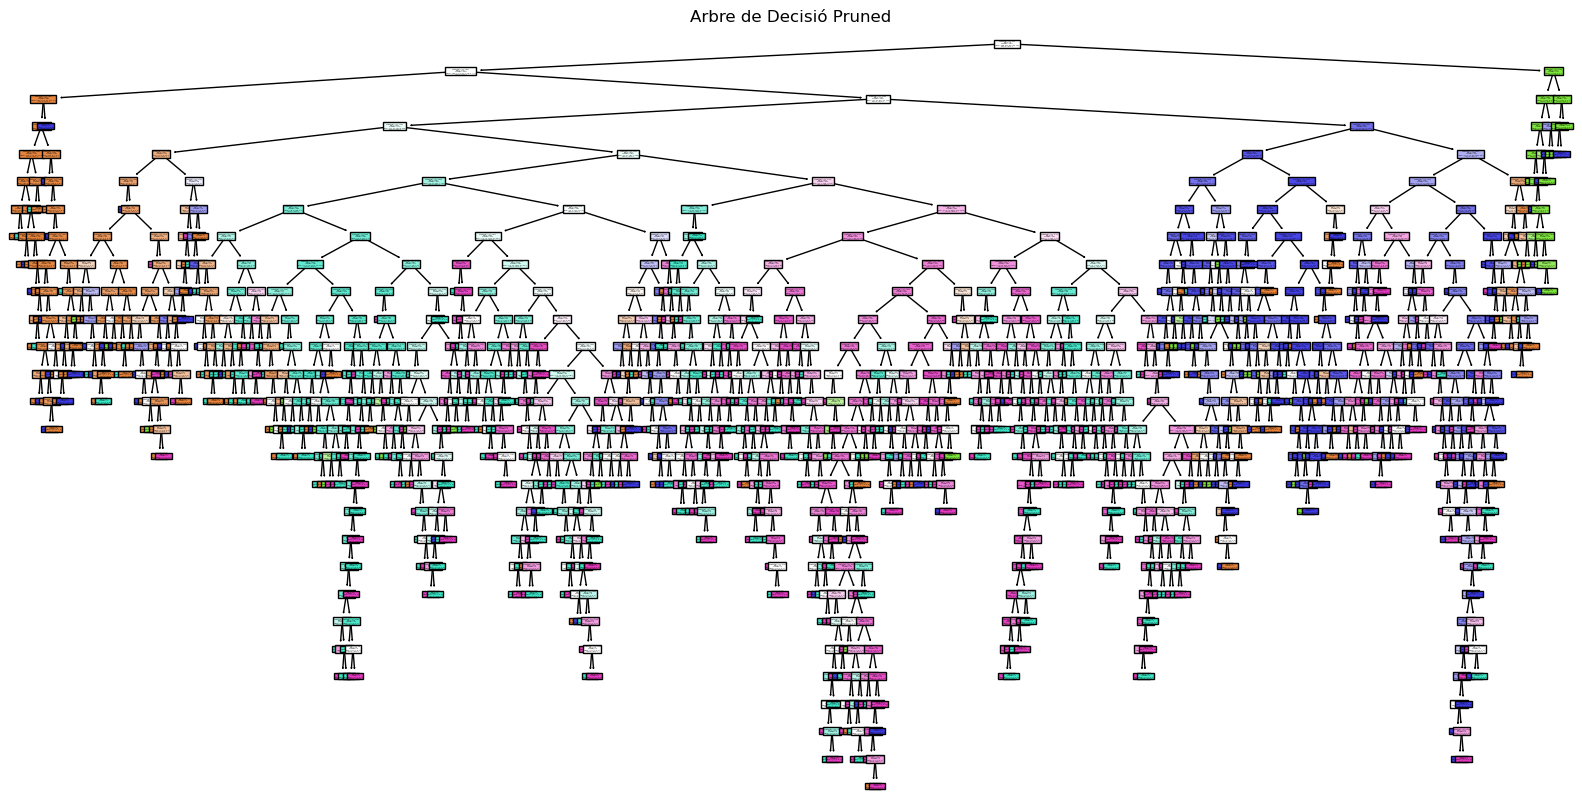

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar el model d'arbre de decisi√≥ amb profunditat m√†xima limitada
model_tree_pruned = DecisionTreeClassifier(random_state=24)
model_tree_pruned.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l‚Äôaccuracy
y_train_pred_tree_pruned = model_tree_pruned.predict(X_train_projection)
y_test_pred_tree_pruned = model_tree_pruned.predict(X_test_projection)

train_accuracy_tree_pruned = accuracy_score(y_train, y_train_pred_tree_pruned)
test_accuracy_tree_pruned = accuracy_score(y_test, y_test_pred_tree_pruned)

print(f"Train Accuracy (Pruned Decision Tree): {train_accuracy_tree_pruned:.2f}")
print(f"Test Accuracy (Pruned Decision Tree): {test_accuracy_tree_pruned:.2f}")

# Matriu de confusi√≥
conf_matrix_tree_pruned = confusion_matrix(y_test, y_test_pred_tree_pruned)
print("Matriu de confusi√≥ (Pruned Decision Tree - conjunt de test):")
print(conf_matrix_tree_pruned)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(model_tree_pruned, X_test_projection, y_test)

# Representar l'arbre de decisi√≥ pruned
plt.figure(figsize=(20, 10))
plot_tree(
    model_tree_pruned, 
    feature_names=["Component 1", "Component 2"], 
    class_names=[f"Classe {i}" for i in range(len(np.unique(y_train)))], 
    filled=True
)
plt.title("Arbre de Decisi√≥ Pruned")
plt.show()


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. **Avalua i comenta els resultats:** Analitza l‚Äô_accuracy_ del model en els conjunts de _train_ i _test_. Si el model t√© un _accuracy_ molt alt en _train_ per√≤ significativament m√©s baix en _test_, aix√≤ pot indicar overfitting. A m√©s, revisa la matriu de confusi√≥ per identificar si hi ha desequilibris en les classificacions correctes i errors per classe.

2. **Reflexiona sobre la frontera de decisi√≥:** Observa si la frontera de decisi√≥ al conjunt de _test_ mostra patrons abruptes o sobrecomplexos. Aquesta caracter√≠stica √©s coherent amb el que esperaries d‚Äôun arbre de decisi√≥, especialment si est√† profundament ajustat al conjunt de _train_.

3. **Observa la representaci√≥ gr√†fica de l‚Äôarbre:** Analitza com les ramificacions mostren les decisions preses pel model. Busca si hi ha nodes fulla amb un nombre molt redu√Øt d‚Äôobservacions o divisions molt espec√≠fiques que podrien indicar sobreajustament. Comprova si les regles de classificaci√≥ s√≥n intu√Øtives i si reflecteixen els patrons esperats en el conjunt de dades.

Aquesta an√†lisi t‚Äôajudar√† a identificar possibles ajustaments al model per millorar la seva capacitat de generalitzaci√≥ i la seva efic√†cia global.

</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

#### Evitant el *overfitting*

El proc√©s de construcci√≥ d‚Äôarbres descrit tendeix a reduir r√†pidament l‚Äôerror d‚Äôentrenament, de manera que, generalment, el model s‚Äôajusta molt b√© a les observacions utilitzades com a entrenament (conjunt de *train*). Com a conseq√º√®ncia, els arbres de decisi√≥ tendeixen a l‚Äô*overfitting*.
   
Per evitar l‚Äô*overfitting* en els arbres de decisi√≥, √©s crucial que modifiquis certs hiperpar√†metres del model de la manera seg√ºent:

1. Utilitza l‚Äôhiperpar√†metre `max_depth`, que defineix la profunditat m√†xima de l‚Äôarbre. Haur√†s d‚Äôexplorar els valors entre 4 i 10 per trobar l‚Äôequilibri adequat entre la complexitat del model i la seva capacitat per generalitzar.
2. Estableix l‚Äôhiperpar√†metre `min_samples_split`, que √©s el nombre m√≠nim d‚Äôobservacions que ha de tenir una fulla de l‚Äôarbre abans de considerar una divisi√≥. Experimenta amb valors com 2, 10, 20, 50 i 100 per assegurar-te que l‚Äôarbre no es torni massa espec√≠fic per a les observacions d‚Äôentrenament.

Ajustant aquests hiperpar√†metres, podr√†s controlar la tend√®ncia de l‚Äôarbre de decisi√≥ a sobreajustar-se al conjunt d‚Äôentrenament, millorant aix√≠ la seva capacitat per fer prediccions efectives en dades noves.

<div class="alert alert-block alert-info">
    <strong>Implementaci√≥:</strong>

1. Calcula el valor √≤ptim dels hiperpar√†metres `max_depth` i `min_samples_split` utilitzant una cerca de graella amb validaci√≥ creuada. Aquest proc√©s t‚Äôajudar√† a trobar els valors √≤ptims que evitaran el sobreajustament.
2. Per a cada combinaci√≥ de valors, calcula la seva mitjana i desviaci√≥ est√†ndard.
3. Fes un _heatmap_ per visualitzar la precisi√≥ segons els diferents valors dels hiperpar√†metres.

Utilitza el m√≤dul `GridSearchCV` de `sklearn` per calcular els millors hiperpar√†metres amb el classificador `DecisionTreeClassifier` de `tree` de `sklearn`. Per a la visualitzaci√≥ del _heatmap_, fes servir la biblioteca `Seaborn`.

Aquests passos et permetran identificar de manera efectiva i visual els valors de `max_depth` i `min_samples_split` que maximitzen la precisi√≥ del teu arbre de decisi√≥, minimitzant el risc de sobreajustament.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Millors hiperpar√†metres: {'max_depth': 10, 'min_samples_split': 100}
Millor precisi√≥ amb validaci√≥ creuada: 0.79


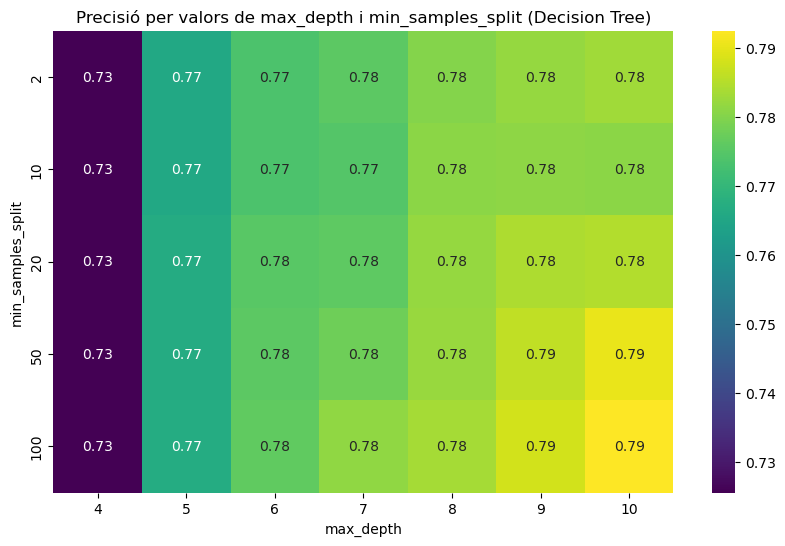

In [17]:
# Definir l'espai d'hiperpar√†metres per a la cerca
param_grid_tree = {
    'max_depth': range(4, 11), 
    'min_samples_split': [2, 10, 20, 50, 100]  
}

# Configurar el model i la cerca de graella amb validaci√≥ creuada
model_tree_cv = DecisionTreeClassifier(random_state=24)
grid_search_tree = GridSearchCV(
    estimator=model_tree_cv,
    param_grid=param_grid_tree,
    cv=5,  # Validaci√≥ creuada amb 5 particions
    scoring='accuracy',
    return_train_score=True
)
grid_search_tree.fit(X_train_projection, y_train)

# Obtenir els resultats de la cerca
results_tree = pd.DataFrame(grid_search_tree.cv_results_)

# Identificar els millors hiperpar√†metres
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

print(f"Millors hiperpar√†metres: {best_params_tree}")
print(f"Millor precisi√≥ amb validaci√≥ creuada: {best_score_tree:.2f}")

# Crear un heatmap per visualitzar la precisi√≥
pivot_data_tree = results_tree.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data_tree, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title("Precisi√≥ per valors de max_depth i min_samples_split (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>


1. Entrena un arbre de decisi√≥ amb el dataset d‚Äôentrenament (_train_) utilitzant la millor combinaci√≥ de par√†metres que hagis trobat.
2. Calcula l‚Äô_accuracy_ (precisi√≥) del model tant en les dades de _train_ com en les de _test_.
3. Calcula la matriu de confusi√≥ utilitzant les dades de _test_.
4. Representa gr√†ficament la frontera de decisi√≥ amb les dades de _test_.
5. Representa l‚Äôarbre de decisi√≥.

Aquests passos et permetran avaluar com l‚Äôarbre de decisi√≥, ajustat amb els hiperpar√†metres √≤ptims, es comporta en el teu conjunt de dades, tant en termes de classificaci√≥ com en la seva representaci√≥ visual.
    
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Train Accuracy (Best Decision Tree): 0.82
Test Accuracy (Best Decision Tree): 0.78
Matriu de confusi√≥ (Best Decision Tree - conjunt de test):
[[176   0  14  17   5]
 [  1 170   2  12   1]
 [  3   0 130   0  61]
 [  9   1   8 169  18]
 [  0   0  55  13 135]]


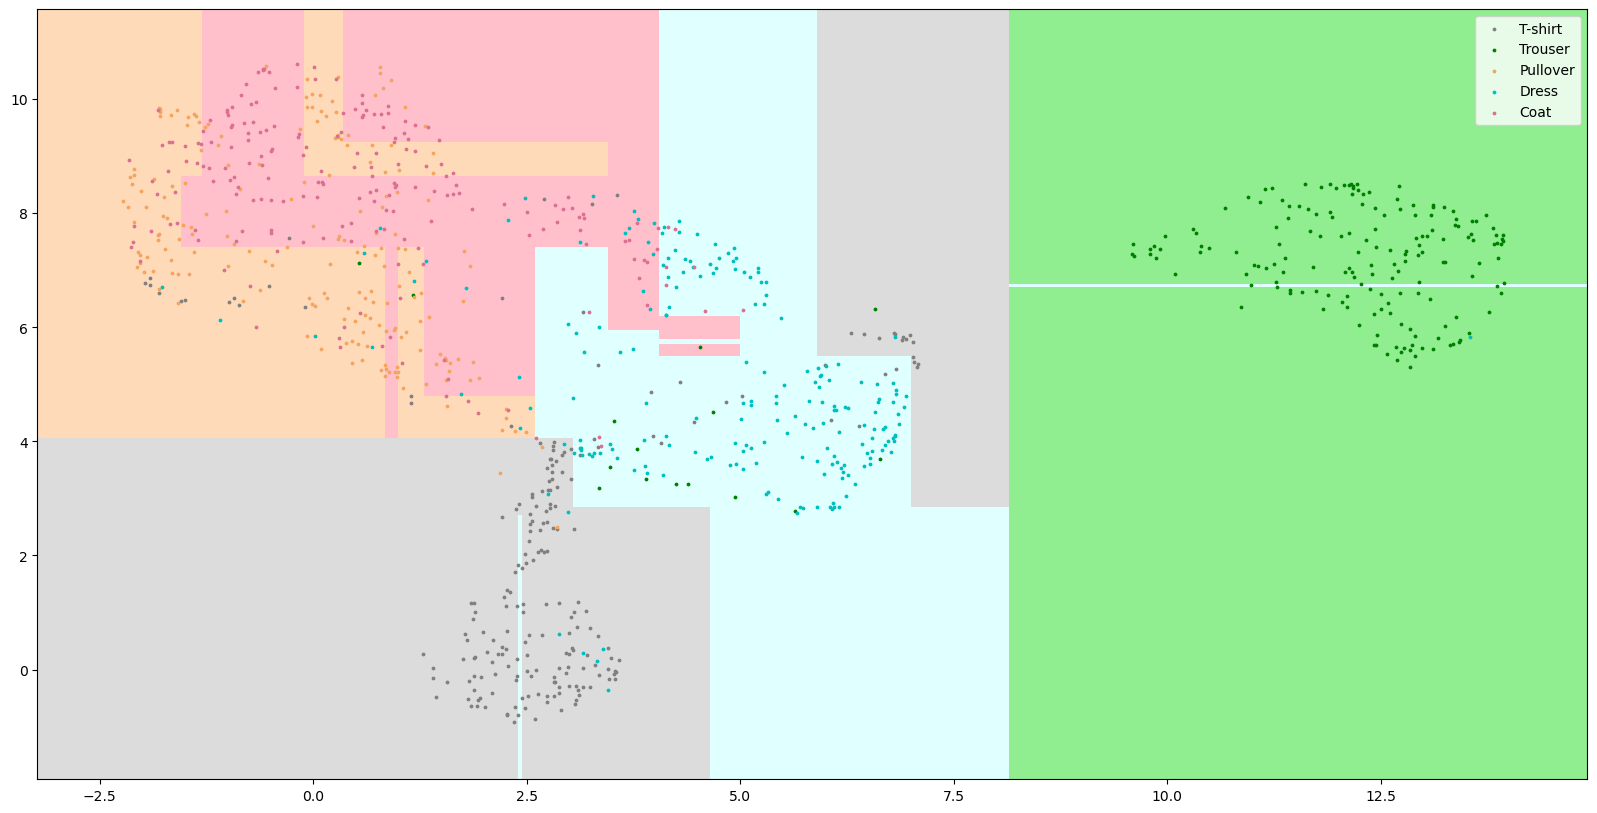

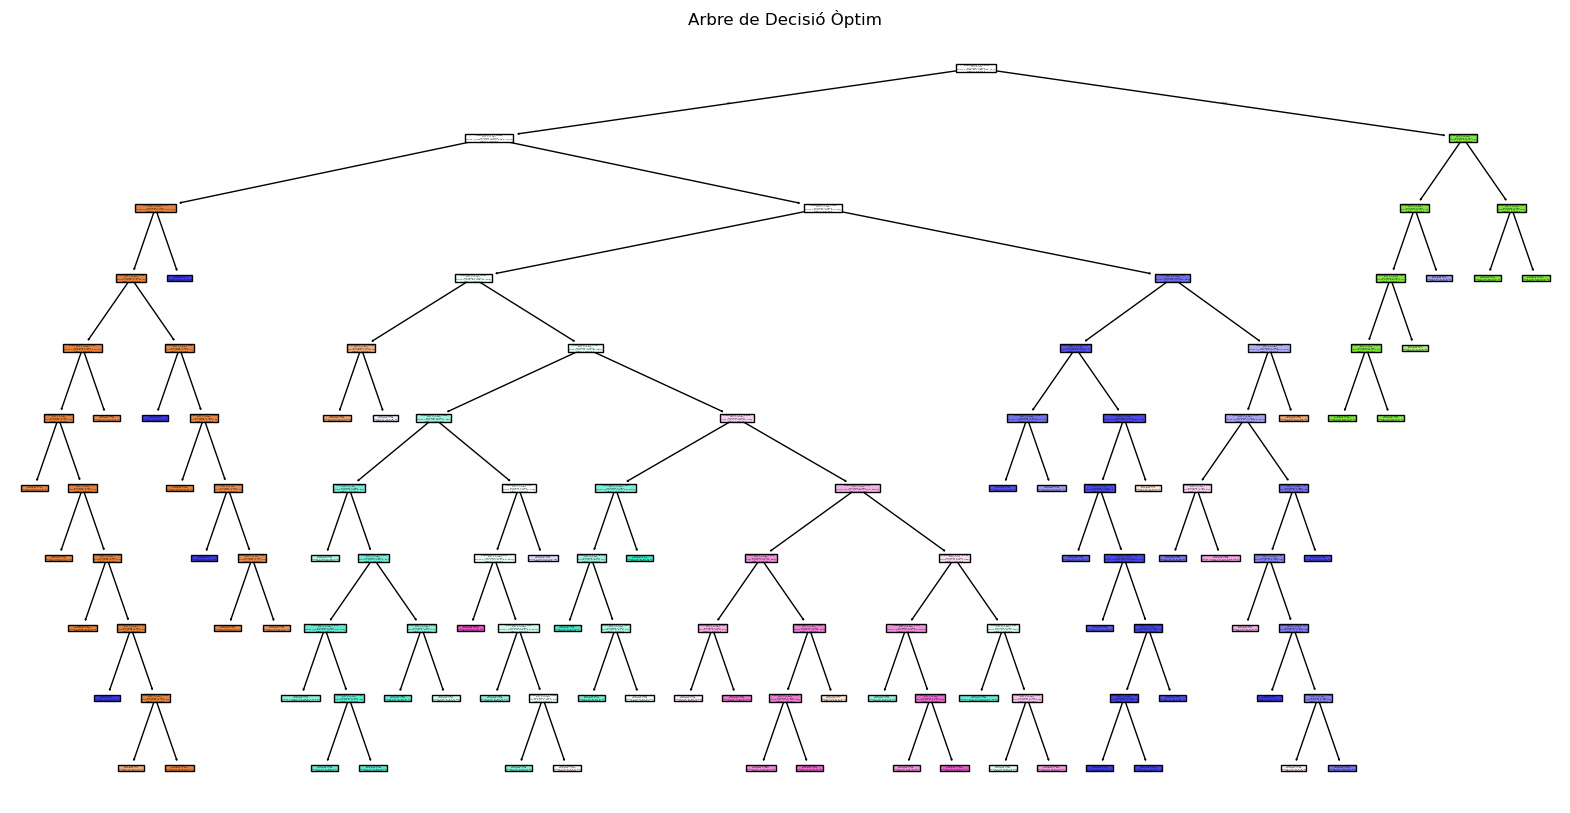

In [18]:
# Entrenar l'arbre de decisi√≥ amb els millors hiperpar√†metres trobats
best_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=100, random_state=24)
best_tree.fit(X_train_projection, y_train)

# Predicci√≥ i c√†lcul de l'accuracy
y_train_pred_tree = best_tree.predict(X_train_projection)
y_test_pred_tree = best_tree.predict(X_test_projection)

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"Train Accuracy (Best Decision Tree): {train_accuracy_tree:.2f}")
print(f"Test Accuracy (Best Decision Tree): {test_accuracy_tree:.2f}")

# Matriu de confusi√≥
conf_matrix_best_tree = confusion_matrix(y_test, y_test_pred_tree)
print("Matriu de confusi√≥ (Best Decision Tree - conjunt de test):")
print(conf_matrix_best_tree)

# Representar gr√†ficament la frontera de decisi√≥
plot_decision_boundaries(best_tree, X_test_projection, y_test)

# Representar l'arbre de decisi√≥
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree, 
    feature_names=["Component 1", "Component 2"], 
    class_names=[f"Classe {i}" for i in range(len(np.unique(y_train)))], 
    filled=True
)
plt.title("Arbre de Decisi√≥ √íptim")
plt.show()


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. Avalua i comenta els resultats obtinguts en la cerca dels millors hiperpar√†metres. Considera com la combinaci√≥ √≤ptima de `max_depth` i `min_samples_split` ha impactat en el rendiment de l‚Äôarbre de decisi√≥.
2. Examina les fronteres de decisi√≥ generades amb el conjunt de _test_. Reflexiona si la forma d‚Äôaquestes fronteres √©s coherent amb el que esperaries d‚Äôun arbre de decisi√≥ configurat amb aquests hiperpar√†metres.
3. Analitza les prediccions realitzades sobre el conjunt de _test_. Observa la seva precisi√≥ i com es distribueixen en relaci√≥ amb les fronteres de decisi√≥. S√≥n consistents aquestes prediccions amb l‚Äôestructura de l‚Äôarbre de decisi√≥ i les fronteres observades?

Aquesta an√†lisi t‚Äôajudar√† a comprendre l‚Äôefic√†cia de l‚Äôarbre de decisi√≥ amb els hiperpar√†metres seleccionats i el seu impacte en la classificaci√≥ de les dades.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<a id='eje2'></a>
# 2. Implementaci√≥ del cas pr√†ctic (5 punts)

Avui dia, la log√≠stica de l‚Äô√∫ltima milla √©s un problema abordat a la ind√∫stria per moltes empreses dedicades al comer√ß electr√≤nic. La informaci√≥ proporcionada a l‚Äôusuari a l‚Äôhora de fer una comanda pot suposar un valor diferencial. Per aix√≤, moltes empreses dediquen molts recursos per oferir una estimaci√≥ precisa sobre el temps que trigar√† a arribar cada comanda. En aquest exercici ens centrarem a predir el nivell de servei de les operacions log√≠stiques de l‚Äô√∫ltima milla d‚ÄôAmazon. En concret, identificarem aquelles entregues que es considerin premium (temps de repartiment inferior a dues hores).

Per fer-ho, utilitzarem el conjunt de dades d‚Äôentregues [amazon-delivery-dataset](https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset), el qual inclou dades sobre m√©s de 43.632 entregues en diverses ciutats, amb informaci√≥ rellevant sobre els detalls de la comanda, els agents de lliurament, les condicions meteorol√≤giques i del tr√†nsit, i les m√®triques de rendiment del lliurament. En concret, el dataset cont√© 16 caracter√≠stiques:

- Order_ID: identificador √∫nic de comanda
- Agent_Age: edat de l‚Äôagent (repartidor)
- Agent_Rating: puntuaci√≥ de l‚Äôagent (repartidor)
- Store_Latitude: latitud del magatzem o botiga
- Store_Longitude: longitud del magatzem o botiga
- Drop_Latitude: latitud del client
- Drop_Longitude: longitud del client
- Order_Date: data de la comanda
- Order_Time: hora de la comanda
- Pickup_Time: hora a la qual la comanda va ser recollida per al seu lliurament
- Weather: informaci√≥ sobre la climatologia
- Traffic: informaci√≥ sobre el tr√†nsit
- Vehicle: informaci√≥ sobre el vehicle
- Area: informaci√≥ sobre l‚Äô√†rea de repartiment
- Category: categoria dels productes de la comanda
- Delivery_Time: temps de lliurament (minuts)

L‚Äôobjectiu d‚Äôaquesta secci√≥ √©s abordar l‚Äôan√†lisi d‚Äôaquest conjunt de dades i entrenar una xarxa neuronal (Perceptr√≥ Multicapa) per predir el nivell de servei. Aqu√≠ tens alguns passos que podries seguir:

1. **An√†lisi Exploratori de Dades (EDA)**: Comen√ßa explorant el conjunt de dades per entendre‚Äôn l‚Äôestructura i distribuci√≥. Analitza la proporci√≥ de cada classe. Observa la distribuci√≥ de les diferents caracter√≠stiques i la seva relaci√≥ amb la classe objectiu "class".

2. **Preprocessament de Dades**: Considera normalitzar les caracter√≠stiques perqu√® estiguin a la mateixa escala que les components principals.

3. **Modelitzaci√≥**: Utilitza un perceptr√≥ multicapa com a eina de classificaci√≥. At√®s que l‚Äôobjectiu √©s identificar el nivell de servei del lliurament, √©s vital centrar-se en m√®triques com la precisi√≥, la sensibilitat (_recall_), el valor F1 i l‚Äô√†rea sota la corba ROC (AUC-ROC

<a id='ej20'></a>
## 2.1. C√†rrega de dades i processament inicial (0.5 punts)

El primer que has de fer √©s carregar el conjunt de dades i visualitzar informaci√≥ rellevant del mateix. Assegura‚Äôt de verificar el seg√ºent:

1. Confirma la quantitat total de files i columnes al DataFrame.
2. Revisa el nom de cada columna del DataFrame.
3. Verifica el nombre de valors no nuls en cada columna.
4. Identifica el tipus de dades de cada columna, que pot ser int, float, object, entre d‚Äôaltres.
5. Comprova la quantitat de mem√≤ria utilitzada pel DataFrame.

Aquests passos et proporcionaran una comprensi√≥ inicial clara i detallada del conjunt de dades amb el qual est√†s treballant.

In [19]:
root_path = kagglehub.dataset_download("sujalsuthar/amazon-delivery-dataset")
dataset_path = os.path.join(root_path, "amazon_delivery.csv") 
data = pd.read_csv(dataset_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [20]:
data.head()

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High   motorcycle           Urban             120   
1      Stormy     Jam      scooter   Metropolitian             165   
2  Sandstorms     Low   motorcycle           Urban             130   
3       Sunny  Medium   motorcycle   Metropolitian             105   
4      Cloudy    High      scooter   Metropolitian             150   

      Category  
0     Clothing  
1  Electronics  
2       Sports  
3    Cosmetics  
4         Toys

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Com es pot observar, no disposem del nivell de servei en el conjunt de dades. Per aix√≤, definirem que totes les entregues realitzades en un m√†xim de dues hores han tingut un servei Premium. Per fer-ho, crea una nova columna denominada "Premium_Delivery", que contingui el valor 1 si l‚Äôentrega s‚Äôha realitzat en un m√†xim de 120 minuts, i un 0 en cas contrari. √âs important assegurar que el tipus de la nova columna sigui enter.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [21]:
# Crear la columna "Premium_Delivery"
data['Premium_Delivery'] = (data['Delivery_Time'] <= 120).astype(int)

print("premium_delivery type = ", data['Premium_Delivery'].dtype) 
data.head()



premium_delivery type =  int32


Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High   motorcycle           Urban             120   
1      Stormy     Jam      scooter   Metropolitian             165   
2  Sandstorms     Low   motorcycle           Urban             130   
3       Sunny  Medium   motorcycle   Metropolitian             105   
4      Cloudy    High      scooter   Metropolitian             150   

      Category  Premium_Delivery  
0     Clothing                 1  
1  Electronics                 0  
2       Sports                 0  
3    Cosmetics                 1  
4         Toys                 0

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Per simplificar l‚Äôexercici i facilitar-ne la comprensi√≥, s‚Äôhan d‚Äôeliminar les seg√ºents columnes: Order_ID, Order_Date, Order_Time i Pickup_Time.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [22]:
# Eliminar les columnes especificades
columns_to_drop = ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time']
data = data.drop(columns=columns_to_drop)

# Verificar les columnes restants
remaining_columns = data.columns.tolist()
remaining_columns


['Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time',
 'Category',
 'Premium_Delivery']

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>
    
A continuaci√≥, calcularem la dist√†ncia haversiana en quil√≤metres entre el magatzem i el client. Per fer-ho, hem de crear una nova columna anomenada "Distance" i eliminar les quatre columnes relacionades amb les coordenades.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [23]:
# Definir la f√≥rmula haversiana per calcular la dist√†ncia
def haversine(lat1, lon1, lat2, lon2):
    # Convertir graus a radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Difer√®ncies entre les coordenades
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # F√≥rmula haversiana
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radi de la Terra en quil√≤metres
    radius_earth_km = 6371.0
    return radius_earth_km * c

# Aplicar la f√≥rmula haversiana per calcular la dist√†ncia
data['Distance'] = haversine(
    data['Store_Latitude'], 
    data['Store_Longitude'], 
    data['Drop_Latitude'], 
    data['Drop_Longitude']
)

# Deixar comentada l'eliminaci√≥ de les columnes relacionades amb coordenades
columns_to_remove = ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
data = data.drop(columns=columns_to_remove)

# Verificar que la columna "Distance" s'ha creat correctament
data[['Distance']].head()



Distance
0   3.025149
1  20.183530
2   1.552758
3   7.790401
4   6.210138

<a id='ej21'></a>
## 2.2. An√†lisi Exploratori de Dades (EDA) (1.25 punts)

L‚ÄôAn√†lisi Exploratori de Dades (EDA, per les seves sigles en angl√®s) en ci√®ncia de dades √©s un enfocament inicial per comprendre i resumir el contingut d‚Äôun conjunt de dades. Aquest proc√©s implica diverses t√®cniques i passos:

1. **Inspecci√≥ de Dades**: Es comen√ßa revisant les dades brutes per identificar-ne l‚Äôestructura, la mida i el tipus (com num√®ric, categ√≤ric). Aix√≤ inclou detectar valors faltants o inusuals.

2. **Resum Estad√≠stic**: Es calculen estad√≠stiques descriptives com la mitjana, mediana, rang, vari√†ncia i desviaci√≥ est√†ndard per obtenir una idea general de les tend√®ncies i patrons en les dades.

3. **Visualitzaci√≥ de Dades**: S‚Äôutilitzen gr√†fics i diagrames (com histogrames, gr√†fics de caixa, diagrames de dispersi√≥) per visualitzar distribucions, relacions entre variables i possibles anomalies. Aix√≤ ajuda a comprendre millor les dades i a identificar patrons o irregularitats.

4. **An√†lisi de Relacions i Correlacions**: S‚Äôexploren les relacions entre diferents variables per entendre com s‚Äôinflueixen entre si. Aix√≤ pot implicar l‚Äô√∫s de matrius de correlaci√≥ i gr√†fics de dispersi√≥.

5. **Identificaci√≥ de Patrons i Anomalies**: Es busquen patrons consistents o anomalies (com valors at√≠pics) que puguin suggerir tend√®ncies o problemes en les dades.

L‚ÄôEDA √©s una fase cr√≠tica en qualsevol projecte de ci√®ncia de dades, ja que proporciona una comprensi√≥ profunda i una base s√≤lida per a posteriors an√†lisis i modelatge.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

1. Calcula les freq√º√®ncies de la variable objectiu (`Premium_Delivery`) en el teu conjunt de dades. 
2. Crea un gr√†fic de barres per visualitzar aquestes freq√º√®ncies. Aix√≤ t‚Äôajudar√† a entendre la proporci√≥ d‚Äôentregues premium en comparaci√≥ amb les que no ho s√≥n.

A continuaci√≥, analitza la distribuci√≥ de les variables num√®riques:

1. Representa gr√†ficament l‚Äôhistograma de les variables, separant les observacions segons la classe a la qual pertanyen (premium o no).
2. Organitza tots els histogrames en un format de 4 files i 1 columna. Aix√≤ facilitar√† la comparaci√≥ visual de les distribucions per a cada classe en cada variable.

Per √∫ltim, analitza la distribuci√≥ de les variables categ√≤riques de forma an√†loga a les variables num√®riques, organitzant tots els histogrames en un format de 5 files i 1 columna.

Aquests passos et permetran obtenir una visi√≥ m√©s clara de l‚Äôestructura del teu conjunt de dades i com les diferents variables poden influir en la identificaci√≥ de les entregues premium.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

C:\Users\tvive\AppData\Local\Temp\ipykernel_13612\3967441344.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_delivery_counts.index, y=premium_delivery_counts.values, palette="viridis")


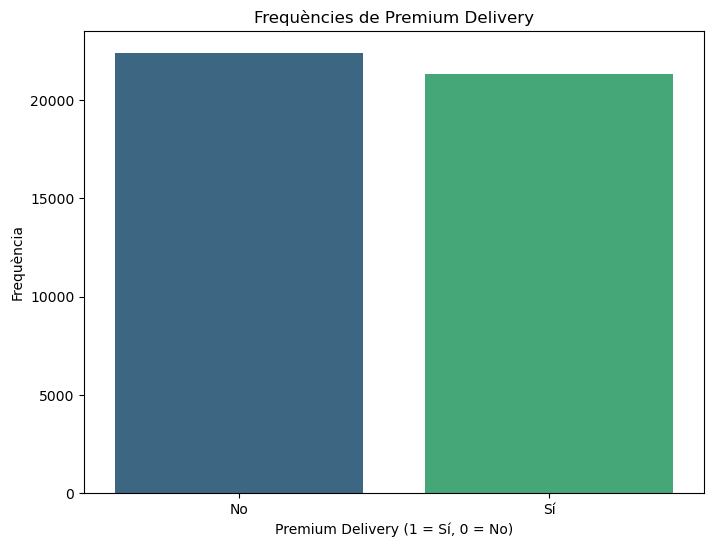

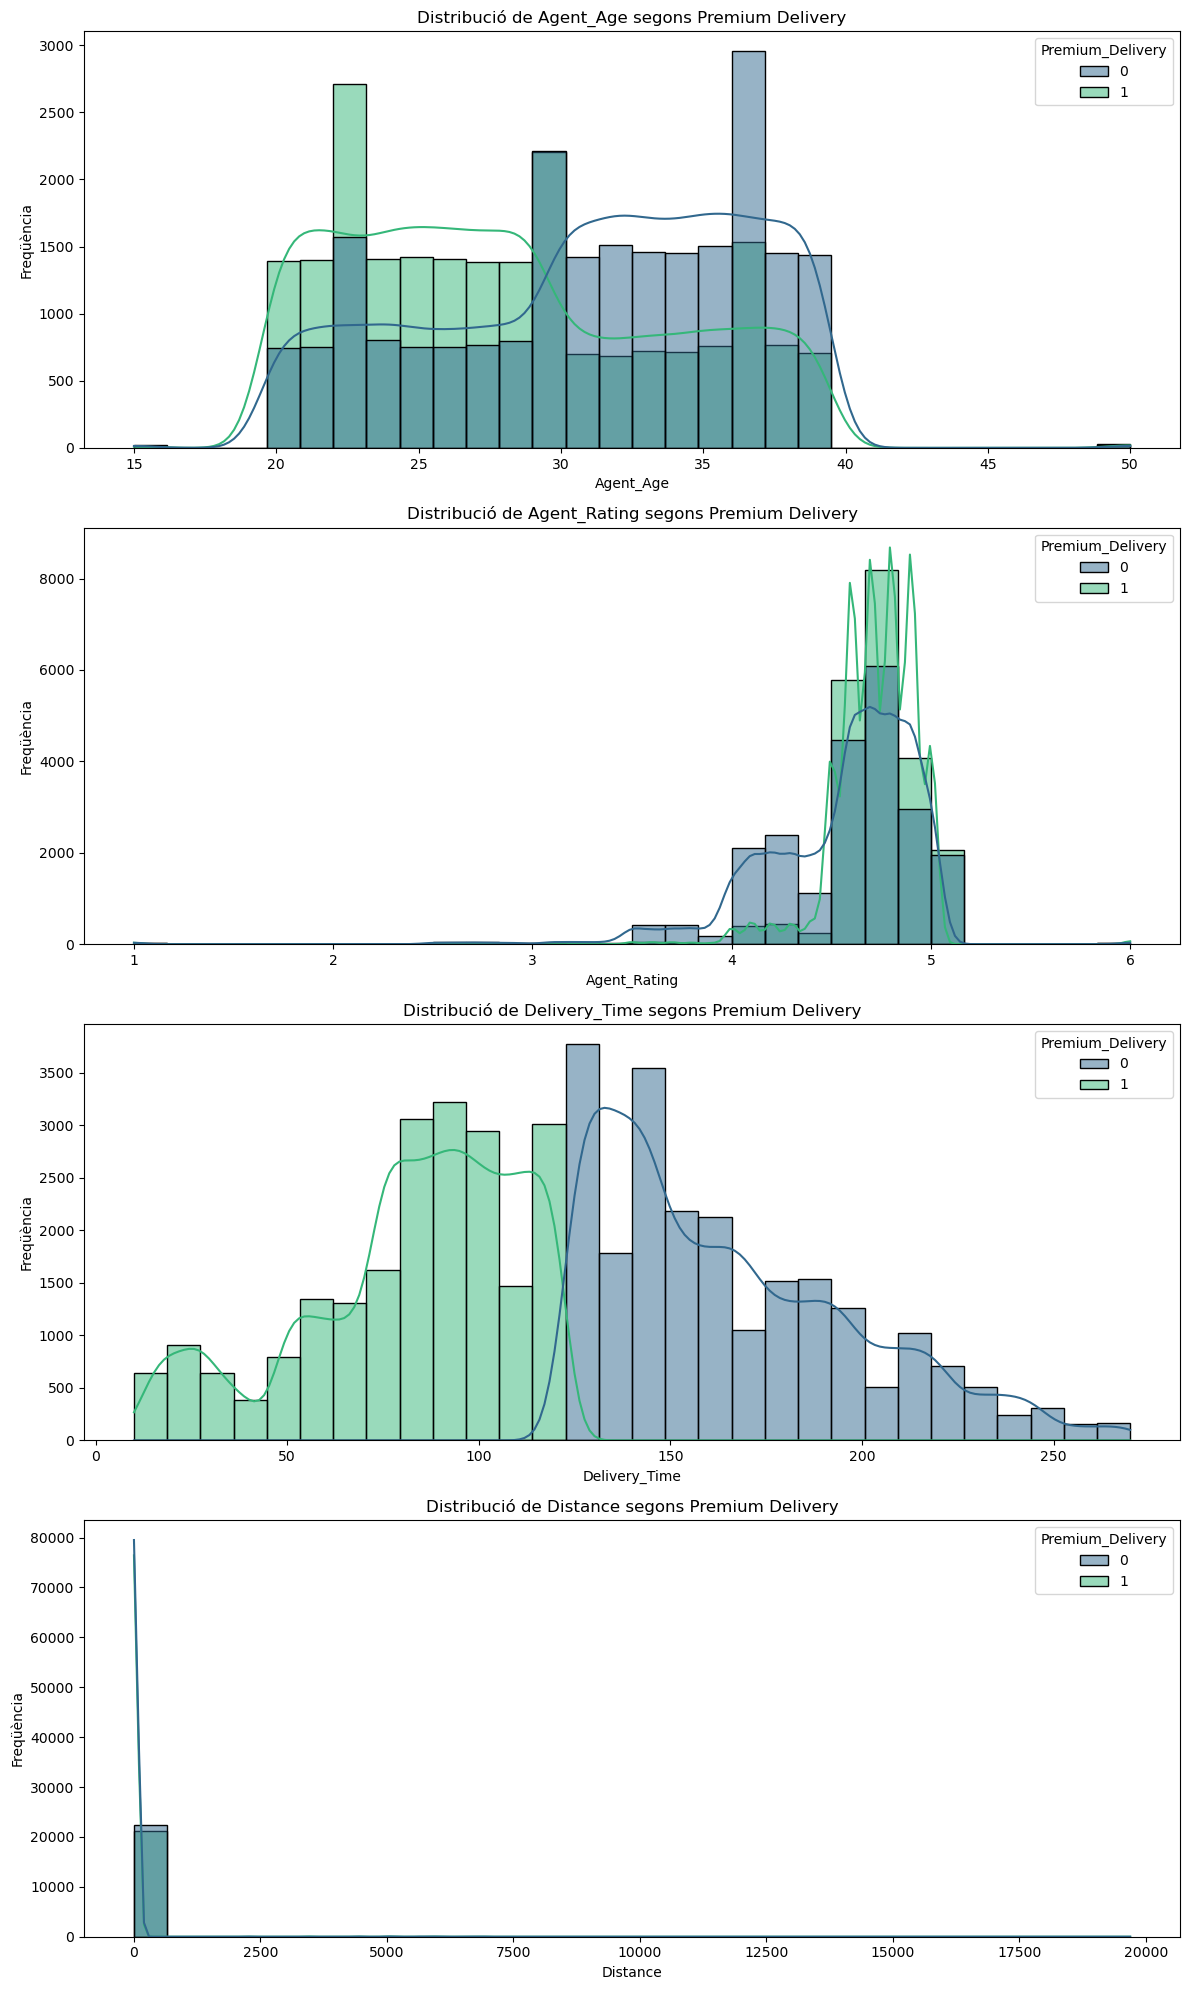

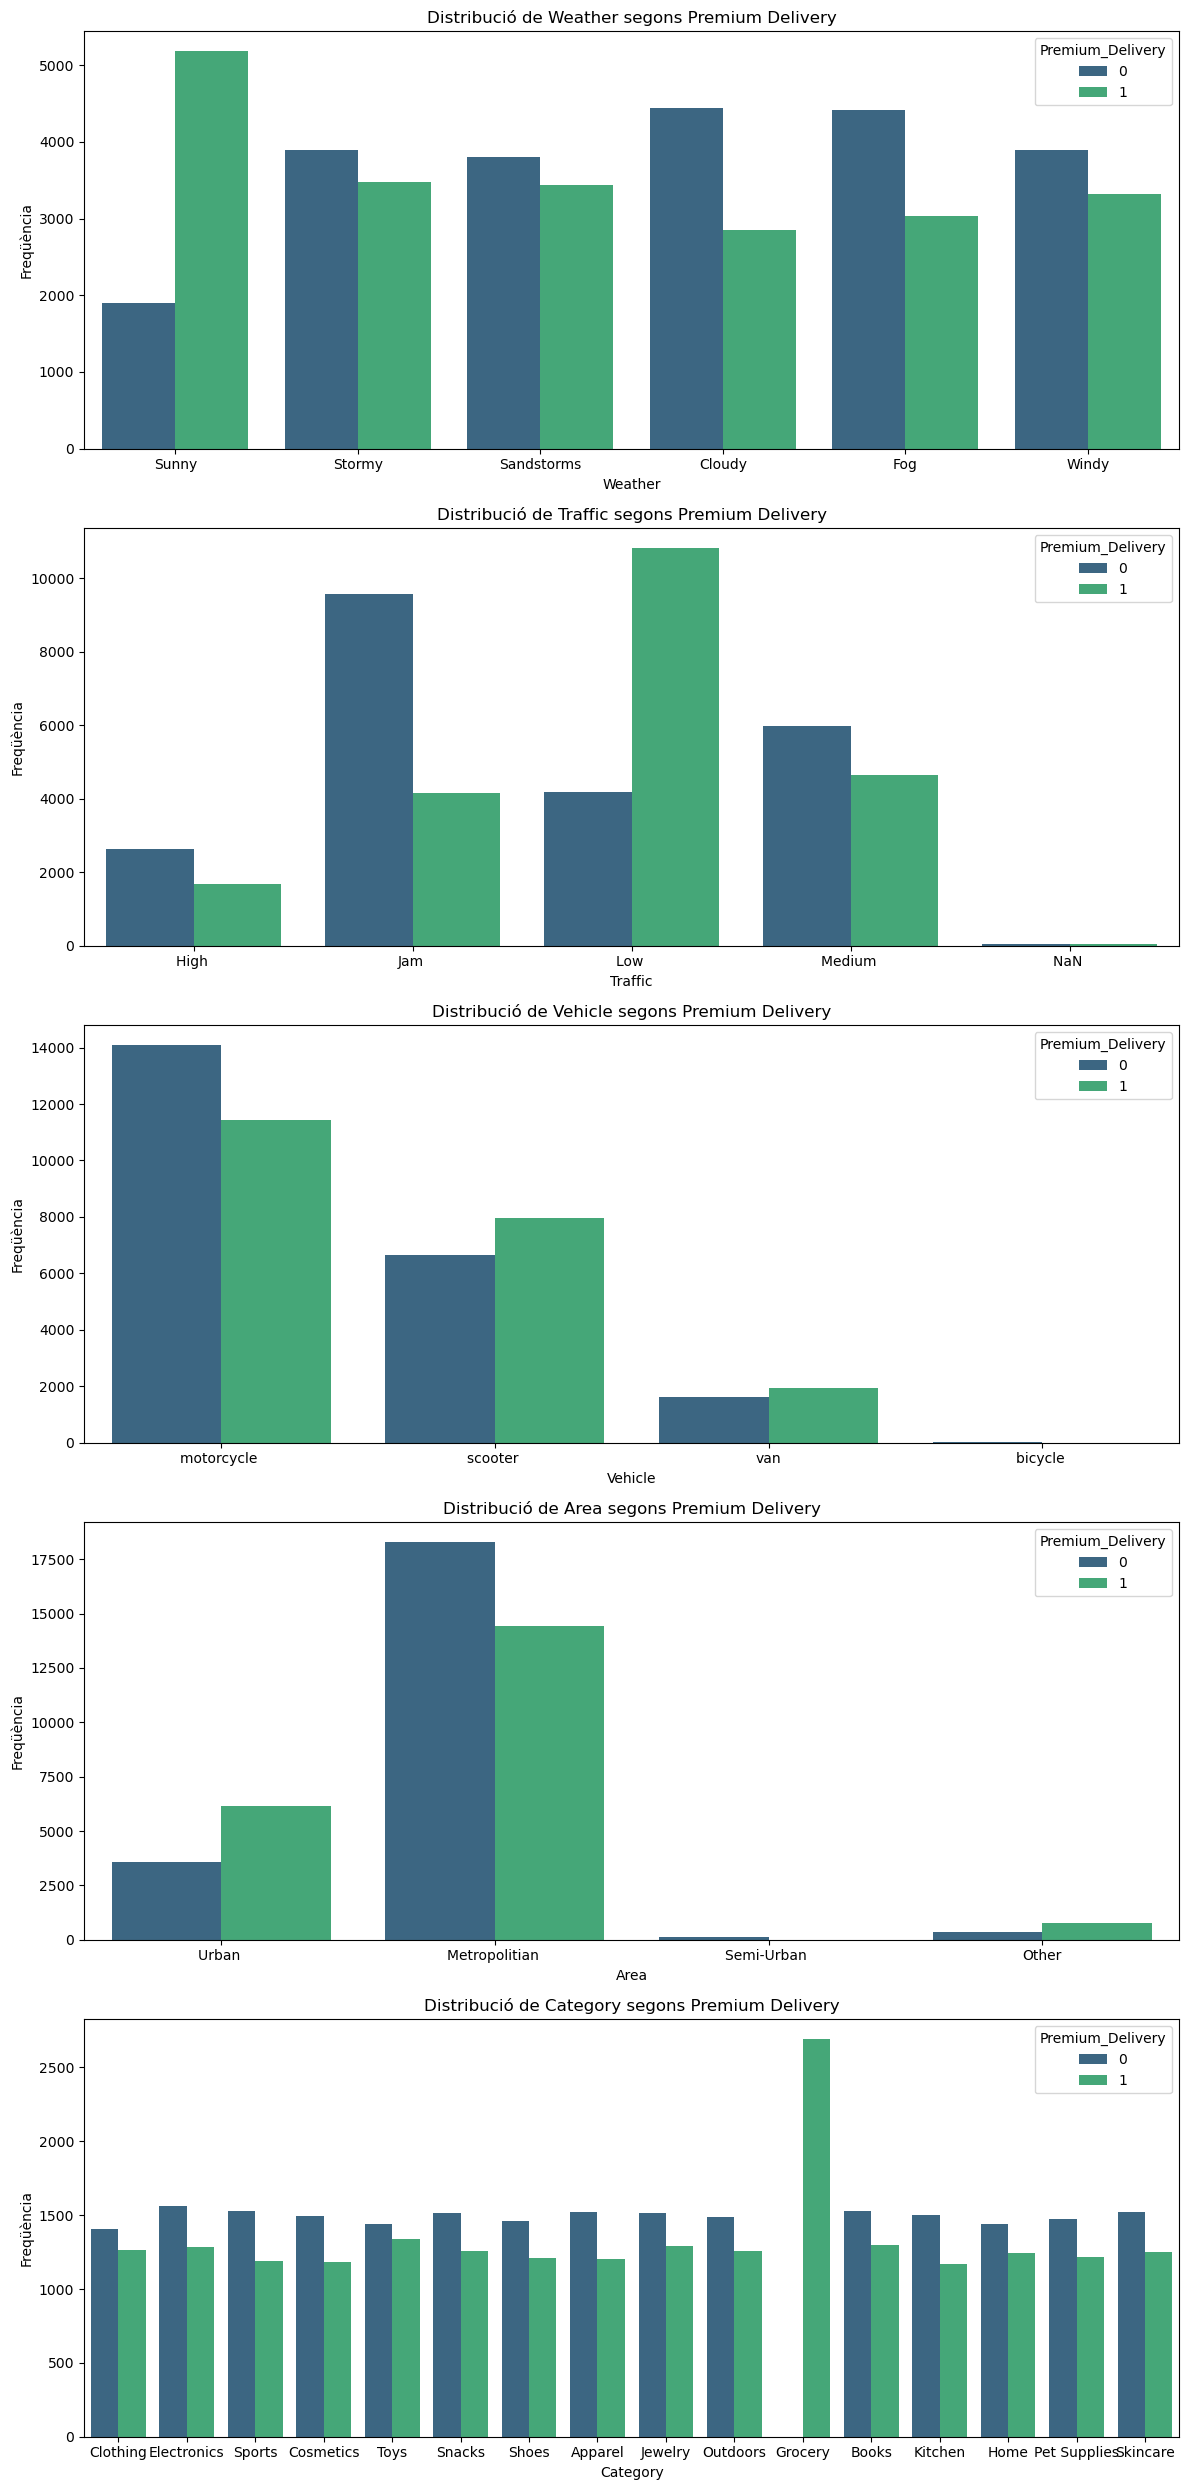

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Freq√º√®ncies de la variable Premium_Delivery
premium_delivery_counts = data['Premium_Delivery'].value_counts()

# Crear un gr√†fic de barres per visualitzar aquestes freq√º√®ncies
plt.figure(figsize=(8, 6))
sns.barplot(x=premium_delivery_counts.index, y=premium_delivery_counts.values, palette="viridis")
plt.title("Frequ√®ncies de Premium Delivery")
plt.xlabel("Premium Delivery (1 = S√≠, 0 = No)")
plt.ylabel("Frequ√®ncia")
plt.xticks([0, 1], ["No", "S√≠"])
plt.show()

# An√†lisi de les variables num√®riques
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Representar els histogrames per cada variable num√®rica
plt.figure(figsize=(12, 20))
for idx, column in enumerate(numeric_columns, start=1):
    plt.subplot(4, 1, idx)
    sns.histplot(data, x=column, hue='Premium_Delivery', kde=True, palette="viridis", bins=30)
    plt.title(f"Distribuci√≥ de {column} segons Premium Delivery")
    plt.xlabel(column)
    plt.ylabel("Freq√º√®ncia")
    if idx == 4:
        break  # Limitar a 4 histogrames per fila
plt.tight_layout()
plt.show()

# An√†lisi de les variables categ√≤riques
categorical_columns = data.select_dtypes(include=['object']).columns

# Representar els histogrames per cada variable categ√≤rica
plt.figure(figsize=(12, 25))
for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(5, 1, idx)
    sns.countplot(data=data, x=column, hue='Premium_Delivery', palette="viridis")
    plt.title(f"Distribuci√≥ de {column} segons Premium Delivery")
    plt.xlabel(column)
    plt.ylabel("Freq√º√®ncia")
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

1. **Avalua la relaci√≥ de les freq√º√®ncies de la variable `Premium_Delivery`:** Reflexiona sobre com es distribueixen les transaccions entre premium i no premium. √âs la distribuci√≥ significativament desigual? Qu√® implica aix√≤ per a l‚Äôan√†lisi i la modelitzaci√≥ de les dades?

2. **Analitza la informaci√≥ proporcionada pels histogrames de les variables descriptives:** Observa si hi ha difer√®ncies notables en les distribucions d‚Äôaquestes variables entre les classes. Pregunta‚Äôt: Hi ha variables que mostrin patrons diferents per al nivell de servei?

3. **Considera altres formes de visualitzaci√≥:** Podrien ser √∫tils altres tipus de gr√†fics per entendre millor les dades? Per exemple:
   - **Diagrames de caixa (boxplots):** Podrien ser √∫tils per visualitzar la distribuci√≥ de les variables en ambdues classes i identificar valors at√≠pics.
   - **Mapa de calor de la matriu de correlaci√≥:** Pot ajudar a entendre les relacions entre les variables i identificar possibles agrupacions o depend√®ncies entre elles.

Aquest an√†lisi t‚Äôajudar√† a obtenir una comprensi√≥ m√©s profunda de la naturalesa de les teves dades i a identificar possibles caracter√≠stiques que podrien ser importants per detectar les entregues premium.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<a id='ej22'></a>
## 2.3. Preprocessament de Dades (1.25 punts)

El preprocessament de dades en ci√®ncia de dades √©s un pas crucial que implica la preparaci√≥ i transformaci√≥ de dades brutes en un format adequat per a la seva posterior an√†lisi i modelatge. Aquest proc√©s inclou diverses tasques essencials:

1. **Neteja de Dades**: S‚Äôeliminen o corregeixen dades err√≤nies, incompletes, inexactes o irrellevants. Aix√≤ pot incloure tractar amb valors faltants, corregir errors d‚Äôentrada i gestionar outliers.

2. **Normalitzaci√≥ i Escalat**: Les dades es transformen perqu√® estiguin en una escala comuna, sense distorsionar difer√®ncies en els rangs de valors ni perdre informaci√≥. Per exemple, escalat min-max o estandarditzaci√≥.

3. **Codificaci√≥ de Variables Categ√≤riques**: Les variables categ√≤riques (com g√®nere o pa√≠s) es converteixen en formats num√®rics perqu√® puguin ser processades per algorismes d‚Äôaprenentatge autom√†tic, utilitzant t√®cniques com codificaci√≥ one-hot o codificaci√≥ d‚Äôetiquetes.

4. **Divisi√≥ de Dades**: Les dades es divideixen en conjunts d‚Äôentrenament, validaci√≥ i prova, permetent entrenar models, ajustar hiperpar√†metres i avaluar el rendiment del model de manera efectiva.

5. **Gesti√≥ de Dades Desbalancejades**: En casos de conjunts de dades desbalancejats, s‚Äôapliquen t√®cniques com sobremostreig o submostreig per assegurar que el model no estigui esbiaixat cap a la classe m√©s freq√ºent.

6. **Enginyeria de Caracter√≠stiques**: Es creen noves variables (caracter√≠stiques) a partir de les dades existents per millorar la capacitat del model per aprendre patrons i fer prediccions.

El preprocessament √©s essencial per millorar la qualitat de les dades i fer-les m√©s adequades i efectives per a l‚Äôan√†lisi i el modelatge en projectes de ci√®ncia de dades.

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong> elimina els atributs categ√≤rics del conjunt de dades i, en el seu lloc, introdueix la transformaci√≥ d‚Äôaquests atributs a tantes variables bin√†ries com categories tinguin. √âs important que les noves columnes generades siguin de tipus enter. Recorda que la codificaci√≥ one-hot converteix les etiquetes categ√≤riques en vectors binaris. En aquests vectors, el valor de 1 s‚Äôassigna a la posici√≥ corresponent a la classe i el valor de 0 a totes les altres posicions. Aix√≤ facilita que els models d‚Äôaprenentatge autom√†tic processin i entenguin les etiquetes categ√≤riques.
<hr>
Suggeriment: utilitzeu la funci√≥ "get_dummies" de "pandas".

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [29]:
# Filtrar nom√©s les columnes categ√≤riques amb menys de 20 categories
filtered_categorical_columns = [col for col in categorical_columns if data[col].nunique() < 20]

# Aplicar codificaci√≥ one-hot nom√©s a aquestes columnes
data_encoded = pd.get_dummies(data, columns=filtered_categorical_columns, dtype=np.uint8)

# Verificar les noves columnes generades i el tipus de dades
encoded_columns = data_encoded.columns
encoded_dtypes = data_encoded.dtypes.unique()

# Mostrar una mostra del conjunt de dades codificat
print("Mostra del dataset codificat amb One-Hot Encoding:")
print(data_encoded.head())

# Verificar les columnes generades i el tipus de dades
encoded_columns = data_encoded.columns
encoded_dtypes = data_encoded.dtypes.unique()
print("\nNoves columnes generades:", encoded_columns)
print("\nTipus de dades en el dataset codificat:", encoded_dtypes)


Mostra del dataset codificat amb One-Hot Encoding:
   Agent_Age  Agent_Rating  Delivery_Time  Premium_Delivery   Distance  \
0         37           4.9            120                 1   3.025149   
1         34           4.5            165                 0  20.183530   
2         23           4.4            130                 0   1.552758   
3         38           4.7            105                 1   7.790401   
4         32           4.6            150                 0   6.210138   

   Weather_Cloudy  Weather_Fog  Weather_Sandstorms  Weather_Stormy  \
0               0            0                   0               0   
1               0            0                   0               1   
2               0            0                   1               0   
3               0            0                   0               0   
4               1            0                   0               0   

   Weather_Sunny  ...  Category_Home  Category_Jewelry  Category_Kitchen  \
0      

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

A la primera secci√≥ de l‚Äôexercici vam observar que la columna `Agent_Rating` tenia un nombre redu√Øt de valors nuls. En aquest exercici hem d‚Äôimputar els valors nuls pel valor m√≠nim de la columna i verificar que cap columna addicional t√© valors nuls.
</div>


<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [30]:
# Imputar els valors nuls de "Agent_Rating" amb el valor m√≠nim de la columna
min_agent_rating = data_encoded['Agent_Rating'].min()
data_encoded['Agent_Rating'].fillna(min_agent_rating, inplace=True)

# Verificar si hi ha valors nuls restants al dataset
missing_values = data_encoded.isnull().sum()

# Filtrar nom√©s les columnes amb valors nuls (si n'hi ha)
columns_with_missing = missing_values[missing_values > 0]

# Resultats
missing_check = {
    "Cap columna addicional t√© valors nuls": columns_with_missing.empty,
    "Columnes amb valors nuls restants": columns_with_missing.to_dict()
}

missing_check


C:\Users\tvive\AppData\Local\Temp\ipykernel_13612\2692768257.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Agent_Rating'].fillna(min_agent_rating, inplace=True)


{'Cap columna addicional t√© valors nuls': True,
 'Columnes amb valors nuls restants': {}}

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Ara dividirem el conjunt de dades. Per fer-ho, segueix aquests passos:

1. Separa els descriptors de la variable resposta. Assigna els descriptors al conjunt `X` i la variable resposta al conjunt `y`.
2. Elimina del conjunt de descriptors la columna `Delivery_Time`, ja que va ser utilitzada per calcular la nostra variable resposta.
3. Divideix el _dataset_ en dos subconjunts: un per a entrenament (_train_) i un altre per a proves (_test_). Assigna el 80% de les dades al conjunt d‚Äôentrenament (`X_train`, `y_train`) i el 20% al conjunt de proves (`X_test`, `y_test`). Utilitza la funci√≥ `train_test_split` de la biblioteca `model_selection` de `sklearn`. Assegura‚Äôt d‚Äôutilitzar `random_state = 24` i fes una divisi√≥ estratificada per mantenir la mateixa proporci√≥ de classes en ambd√≥s conjunts.

</div>


<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

1. Normalitza els descriptors utilitzant el `StandardScaler` de `sklearn`. Aix√≤ estandarditzar√† les caracter√≠stiques restant la mitjana i dividint per la desviaci√≥ est√†ndard.
2. Mostra les dimensions del conjunt de descriptors original, del conjunt d‚Äôentrenament i del conjunt de prova. Aix√≤ et permetr√† veure com s‚Äôhan dividit les dades.

<strong>Nota:</strong> Ajusta el `StandardScaler` √∫nicament amb els descriptors d‚Äôentrenament per evitar la fuga d‚Äôinformaci√≥ o 'data leakage'. La fuga d‚Äôinformaci√≥ ocorre quan s‚Äôutilitza informaci√≥ del conjunt de prova o validaci√≥ en el proc√©s d‚Äôajust del model. √âs a dir, si ajustes el model d‚Äôescalat amb tot el conjunt de dades, estaries utilitzant informaci√≥ del conjunt de prova o validaci√≥ en l‚Äôajust, fet que podria donar la impressi√≥ que el model √©s m√©s prec√≠s del que realment √©s. Per tant, assegura‚Äôt d‚Äôajustar el `StandardScaler` nom√©s amb les dades d‚Äôentrenament i despr√©s aplicar-lo als conjunts d‚Äôentrenament i prova.
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [31]:
from sklearn.model_selection import train_test_split

# Separar els descriptors (X) de la variable resposta (y)
X = data_encoded.drop(columns=['Premium_Delivery', 'Delivery_Time']) 
y = data_encoded['Premium_Delivery']

# Dividir el dataset en entrenament i prova amb divisi√≥ estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24, stratify=y
)

# Verificar la distribuci√≥ de classes en els conjunts
class_distribution = {
    "Train Class Distribution": y_train.value_counts(normalize=True).to_dict(),
    "Test Class Distribution": y_test.value_counts(normalize=True).to_dict()
}

# Resultats
X_train.shape, X_test.shape, class_distribution


((34991, 38),
 (8748, 38),
 {'Train Class Distribution': {0: 0.5119316395644594, 1: 0.4880683604355406},
  'Test Class Distribution': {0: 0.5120027434842249, 1: 0.487997256515775}})

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Converteix els conjunts de dades d‚Äôentrenament i prova en tensors utilitzant el m√®tode `tensor` de la biblioteca `PyTorch`.
</div>


<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [32]:
import torch

# Convertir els conjunts d'entrenament i prova en tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Verificar els tensors creats
tensors_info = {
    "X_train_tensor shape": X_train_tensor.shape,
    "y_train_tensor shape": y_train_tensor.shape,
    "X_test_tensor shape": X_test_tensor.shape,
    "y_test_tensor shape": y_test_tensor.shape,
}

tensors_info


{'X_train_tensor shape': torch.Size([34991, 38]),
 'y_train_tensor shape': torch.Size([34991]),
 'X_test_tensor shape': torch.Size([8748, 38]),
 'y_test_tensor shape': torch.Size([8748])}

<a id='ej23'></a>
## 2.4. Modelitzaci√≥ (2 punts)

El MLP (Perceptr√≥ Multicapa) √©s, sens dubte, una eina poderosa en el camp de l‚Äôaprenentatge autom√†tic i la intel¬∑lig√®ncia artificial. Pot manejar tasques de classificaci√≥ i regressi√≥, fet que el fa vers√†til per a una varietat de problemes. La seva capacitat per modelar relacions no lineals complexes el converteix en una elecci√≥ popular quan les dades no segueixen patrons lineals simples.

Aqu√≠ hi ha alguns punts clau sobre el MLP:

- **Capes i Neurones**: El MLP consta de m√∫ltiples capes de neurones, que inclouen una capa d‚Äôentrada, una o m√©s capes ocultes i una capa de sortida. Cada neurona d‚Äôuna capa est√† connectada a totes les neurones de la capa seg√ºent.

- **Funcions d‚ÄôActivaci√≥**: Per introduir no linealitat en el model, s‚Äôutilitzen funcions d‚Äôactivaci√≥ a les neurones, com la funci√≥ sigmoide, ReLU (Rectified Linear Unit) o tangent hiperb√≤lica. Aquestes funcions permeten al MLP capturar patrons complexos en les dades.

- **Aprenentatge Supervisat**: L‚Äôentrenament del MLP implica ajustar els pesos de les connexions entre neurones per minimitzar la difer√®ncia entre les sortides produ√Ødes per la xarxa i les sortides desitjades. Aix√≤ es fa utilitzant algorismes d‚Äôaprenentatge supervisat, com el descens del gradient.

- **Ajust d‚ÄôHiperpar√†metres**: Igual que altres models d‚Äôaprenentatge autom√†tic, el MLP t√© hiperpar√†metres importants, com el nombre de capes ocultes, el nombre de neurones a cada capa, la funci√≥ d‚Äôactivaci√≥ i la taxa d‚Äôaprenentatge. Sovint, √©s necessari ajustar aquests hiperpar√†metres per obtenir un bon rendiment en una tasca espec√≠fica.

- **Generalitzaci√≥**: Un dels desafiaments en l‚Äôentrenament de MLP √©s evitar el sobreajustament (overfitting), on el model s‚Äôadapta massa a les dades d‚Äôentrenament i no generalitza b√© a dades noves. La regularitzaci√≥ i la validaci√≥ creuada s√≥n t√®cniques comunes per abordar aquest problema.

En aquest context, el MLP pot ser una excel¬∑lent opci√≥ per modelar patrons complexos que indiquin quan una entrega ser√† premium. No obstant aix√≤, √©s important ajustar i avaluar acuradament el model per garantir que funcioni de manera efectiva en aquesta tasca cr√≠tica.

Crear i entrenar un MLP amb diverses capes ocultes amb funci√≥ d‚Äôactivaci√≥ ReLU √©s una excel¬∑lent elecci√≥. La funci√≥ d‚Äôactivaci√≥ ReLU (Rectified Linear Unit) s‚Äôutilitza comunament a capes ocultes de xarxes neuronals a causa de la seva capacitat per introduir no linealitat al model, permetent-li aprendre patrons complexos a les dades.

D‚Äôaltra banda, l‚Äôenfocament d‚Äôapilar capes lineals utilitzant la classe `Linear` de PyTorch √©s una forma efica√ß i senzilla de construir models de xarxes neuronals.

In [24]:
def train_model(model, X_train, y_train, X_val, y_val, n_epochs, batch_size):
    batch_start = torch.arange(0, len(X_train), batch_size)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = nn.BCELoss()

    best_acc = - np.inf
    best_weights = None

    train_loss_hist = []
    train_acc_hist = []
    val_loss_hist = []
    val_acc_hist = []
 
    for epoch in range(n_epochs):
        epoch_loss = []
        epoch_acc = []
        model.train()
        
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:

                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]

                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)

                # backward pass
                optimizer.zero_grad()
                loss.backward()

                # update weights
                optimizer.step()

                # compute and store metrics
                acc = (y_pred.round() == y_batch).float().mean()
                epoch_loss.append(float(loss))
                epoch_acc.append(float(acc))
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )

        # Evaluating the model at the end of each epoch
        model.eval()
        y_pred = model(X_val)
        ce = float(loss_fn(y_pred, y_val))
        acc = float((y_pred.round() == y_val).float().mean())

        train_loss_hist.append(np.mean(epoch_loss))
        train_acc_hist.append(np.mean(epoch_acc))
        val_loss_hist.append(ce)
        val_acc_hist.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
        # print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

    model.load_state_dict(best_weights)
    return best_acc, train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>
    
La modelitzaci√≥ del MLP la realitzarem amb la biblioteca `PyTorch`. Per fer-ho:

1. Comen√ßa creant el model `BinaryServiceLevel`, per al qual √©s necessari crear una classe que hereti de `nn.Module`.
2. Al constructor (`__init__`), declara les seg√ºents capes:
    - Una capa lineal `nn.Linear` d‚Äôentrada amb una mida de sortida de 19, i una funci√≥ d‚Äôactivaci√≥ ReLU `nn.ReLU`.
    - Una capa lineal `nn.Linear` amb una mida de sortida de 19, i una funci√≥ d‚Äôactivaci√≥ ReLU `nn.ReLU`.
    - Una capa lineal `nn.Linear` de sortida amb una funci√≥ d‚Äôactivaci√≥ Sigmoid `nn.Sigmoid`.
3. Despr√©s, al m√®tode `forward` enlla√ßa les diferents capes i les seves respectives funcions d‚Äôactivaci√≥ en l‚Äôordre definit en el punt anterior.
4. No oblidis mostrar el nombre de par√†metres utilitzant el m√®tode `.parameters()` del model.
</div>

In [38]:
class BinaryServiceLevelBase(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 19)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(19, 19)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(19, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [39]:
# Inicialitzar el model amb input_size
input_size = X_train_tensor.shape[1]  # Nombre de caracter√≠stiques
model = BinaryServiceLevelBase(input_size)

# Comptar el nombre de par√†metres
num_params = sum(p.numel() for p in model.parameters())
print(f"Nombre total de par√†metres del model: {num_params}")

Nombre total de par√†metres del model: 1141


<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>
  
1. Ara √©s el moment d‚Äôentrenar i validar el model aplicant validaci√≥ creuada utilitzant `StratifiedKFold` sobre el conjunt d‚Äôentrenament, amb un valor de k = 5 i `shuffle = True`.
2. En cada divisi√≥ (split), el model s‚Äôha d‚Äôentrenar utilitzant la funci√≥ `train_model`. Assegura‚Äôt d‚Äôentrenar amb les dades d‚Äôentrenament i validaci√≥ de cada divisi√≥, establint el nombre d‚Äô√®poques en 15 i la mida del lot en 32.
3. En cada iteraci√≥ s‚Äôhan de calcular les seg√ºents m√®triques:
    - Calcula l‚Äôexactitud (_accuracy_) per mesurar la precisi√≥ de les prediccions.
    - Calcula el valor F1, que √©s una mesura que combina precisi√≥ i sensibilitat.
    - Calcula l‚Äô√†rea sota la corba ROC (AUC-ROC) per avaluar el rendiment del model en la classificaci√≥ bin√†ria.
4. Finalment, s‚Äôha de mostrar la mitjana de cadascuna de les m√®triques calculades en el punt anterior.

</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [46]:
# Entrenament i validaci√≥ amb StratifiedKFold
accuracy_list = []
f1_list = []
roc_auc_list = []

for train_idx, val_idx in skf.split(X_train_tensor, y_train_tensor):
    # Dividir el conjunt d'entrenament i validaci√≥
    X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
    y_train_fold, y_val_fold = y_train_tensor[train_idx], y_train_tensor[val_idx]
    
    # Inicialitzar el model
    model = BinaryServiceLevelBase(input_size)
    
    # Entrenar el model
    best_acc, train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist = train_model(
        model, X_train_fold, y_train_fold.view(-1, 1), X_val_fold, y_val_fold.view(-1, 1), n_epochs, batch_size
    )
    
    # Predir amb el model entrenat
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_fold).numpy()
        y_val_pred_class = (y_val_pred > 0.5).astype(int)
    
    # Calcular m√®triques
    acc = accuracy_score(y_val_fold.numpy(), y_val_pred_class)
    f1 = f1_score(y_val_fold.numpy(), y_val_pred_class)
    roc_auc = roc_auc_score(y_val_fold.numpy(), y_val_pred)
    
    # Emmagatzemar m√®triques
    accuracy_list.append(acc)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Calcular la mitjana de les m√®triques
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_f1 = sum(f1_list) / len(f1_list)
mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)

# Mostrar resultats
results = {
    "Mitjana Accuracy": mean_accuracy,
    "Mitjana F1": mean_f1,
    "Mitjana AUC-ROC": mean_roc_auc
}

results


{'Mitjana Accuracy': 0.7880597403760902,
 'Mitjana F1': 0.7793660829994927,
 'Mitjana AUC-ROC': 0.8813859330312745}

<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>
    
1. Realitza una an√†lisi dels resultats i decideix si consideres que aquest model √©s acceptable.
2. Avalua quina de les mesures de rendiment utilitzades √©s la m√©s apropiada.
3. Examina la distribuci√≥ de les classes i planteja una estrat√®gia, si √©s necessari, per assegurar la fiabilitat de l‚Äôestudi realitzat.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>
  
Ara √©s el moment d‚Äôanalitzar la fase d‚Äôentrenament. Per fer-ho:
 
1. Divideix el conjunt d‚Äôentrenament en dos subconjunts: un per a entrenament (train) i un altre per a validaci√≥ (val), assignant el 80% de les dades al conjunt d‚Äôentrenament.
2. Entrena el model amb la funci√≥ `model_train`, guardant tots els par√†metres que retorna.
3. Crea gr√†fics que mostrin la p√®rdua (`loss`) tant en l‚Äôentrenament com en la validaci√≥ al llarg de les √®poques.
4. Finalment, genera gr√†fics que representin l‚Äôexactitud (`accuracy`) en l‚Äôentrenament i la validaci√≥ al llarg de les √®poques.

  
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

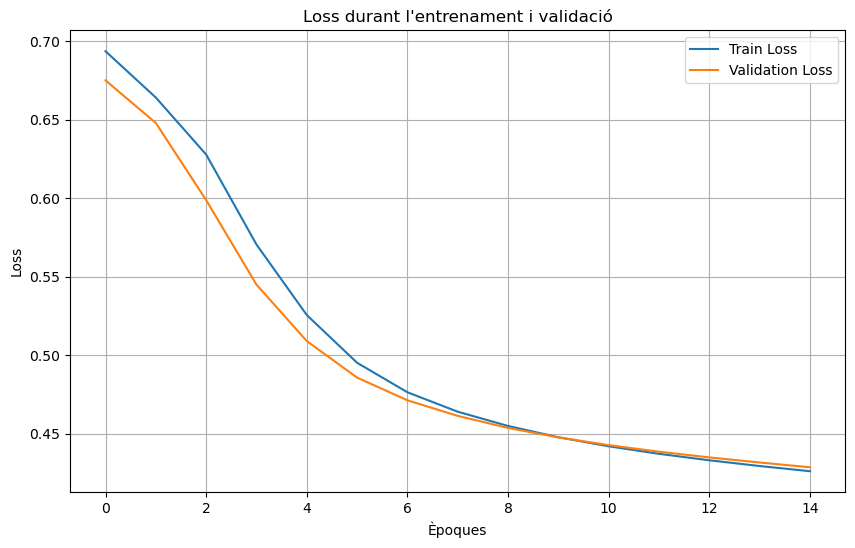

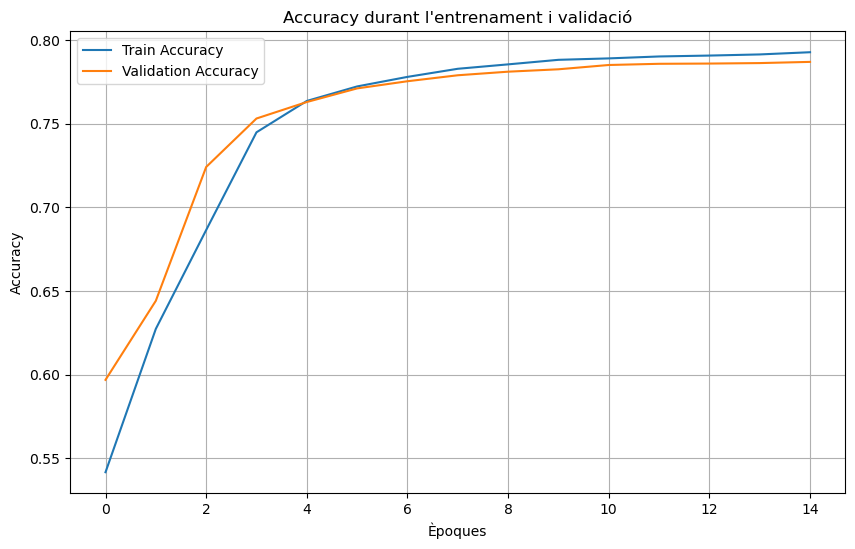

In [47]:
# Dividir el conjunt d'entrenament en entrenament i validaci√≥
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=24, stratify=y_train_tensor
)

# Entrenar el model amb la funci√≥ train_model
model = BinaryServiceLevelBase(input_size)
best_acc, train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist = train_model(
    model, X_train_split, y_train_split.view(-1, 1), X_val_split, y_val_split.view(-1, 1), n_epochs=15, batch_size=32
)

# Crear gr√†fics de p√®rdua (loss) durant l'entrenament i validaci√≥
plt.figure(figsize=(10, 6))
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Validation Loss")
plt.title("Loss durant l'entrenament i validaci√≥")
plt.xlabel("√àpoques")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Crear gr√†fics d'exactitud (accuracy) durant l'entrenament i validaci√≥
plt.figure(figsize=(10, 6))
plt.plot(train_acc_hist, label="Train Accuracy")
plt.plot(val_acc_hist, label="Validation Accuracy")
plt.title("Accuracy durant l'entrenament i validaci√≥")
plt.xlabel("√àpoques")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>

Quines conclusions pots obtenir de les gr√†fiques tant de la p√®rdua (`loss`) com de l‚Äôexactitud (`accuracy`) en l‚Äôentrenament i la validaci√≥ al llarg de les √®poques?
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>
  
√âs hora d‚Äôavaluar el rendiment del model en el conjunt de prova. Per fer-ho:
   
1. Realitza la predicci√≥ sobre el conjunt de prova.
2. Calcula les m√®triques dels apartats anteriors: exactitud (accuracy), F1 score i corba ROC.
 
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

In [48]:
# Realitzar la predicci√≥ sobre el conjunt de prova
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor).numpy()
    y_test_pred_class = (y_test_pred > 0.5).astype(int)

# Calcular les m√®triques
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred_class)
test_f1 = f1_score(y_test_tensor.numpy(), y_test_pred_class)
test_roc_auc = roc_auc_score(y_test_tensor.numpy(), y_test_pred)

# Mostrar els resultats
test_results = {
    "Accuracy": test_accuracy,
    "F1 Score": test_f1,
    "AUC-ROC": test_roc_auc
}

test_results


{'Accuracy': 0.7846364883401921,
 'F1 Score': 0.7781441356570891,
 'AUC-ROC': 0.8815153938493636}

<div class="alert alert-block alert-info">
<strong>Implementaci√≥:</strong>

Per analitzar el model entrenat, ens basarem en els [Shapley values](https://en.wikipedia.org/wiki/Shapley_value), que introdueixen l‚Äôexplicaci√≥ de models d‚Äôaprenentatge autom√†tic. L‚Äôobjectiu √©s explicar la predicci√≥ d‚Äôun model calculant la contribuci√≥ de cada caracter√≠stica a la predicci√≥. La descripci√≥ t√®cnica del concepte de SHAP √©s el c√†lcul dels valors de Shapley a partir de la teoria de jocs. En poques paraules, els valors de Shapley s√≥n un m√®tode per mostrar l‚Äôimpacte relatiu de cada caracter√≠stica (o variable) que estem mesurant en el resultat final del model d‚Äôaprenentatge autom√†tic, comparant l‚Äôefecte relatiu de les entrades amb la mitjana.

Per calcular els _shap values_:

1. Selecciona una mostra de 10000 registres del conjunt d‚Äôentrenament.
2. Inicialitza l‚Äô'explainer' `shap.DeepExplainer` amb el model entrenat i la mostra anterior.
3. Selecciona una mostra de 400 registres del conjunt d‚Äôentrenament.
4. Calcula els _shap values_ utilitzant la mostra anterior.
5. Defineix i mostra un DataFrame amb tres columnes:
   - Mitjana aritm√®tica del valor absolut dels valors.
   - Desviaci√≥ t√≠pica del valor absolut dels valors.
   - Nom de l‚Äôatribut descriptiu.
6. Mostra la representaci√≥ gr√†fica dels valors utilitzant la biblioteca SHAP.
 
</div>

<div class="alert alert-block alert-danger">
<strong>Soluci√≥:</strong>
</div>

Resum dels SHAP values:
                  Feature  Mean Absolute Shap Value  Standard Deviation
0               Agent_Age                  0.139263            0.082490
11           Traffic_Low                   0.114513            0.045685
7           Weather_Sunny                  0.078125            0.077732
2                Distance                  0.072829            0.056894
10           Traffic_Jam                   0.054921            0.025556
27       Category_Grocery                  0.053242            0.106279
16       Vehicle_scooter                   0.052892            0.022622
1            Agent_Rating                  0.035267            0.040194
21            Area_Urban                   0.032641            0.023306
9           Traffic_High                   0.024416            0.033656
3          Weather_Cloudy                  0.023078            0.023225
4             Weather_Fog                  0.022745            0.025896
17            Vehicle_van               

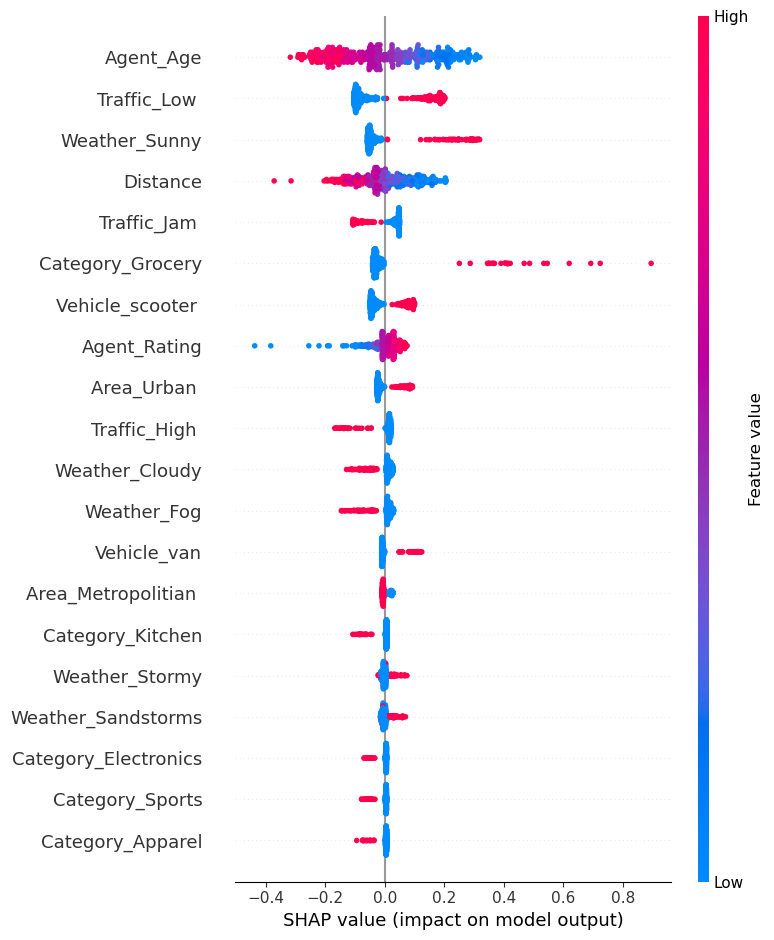

In [53]:
# Seleccionar una mostra de 10000 registres del conjunt d‚Äôentrenament
sample_size = min(10000, len(X_train_tensor))
train_sample = X_train_tensor[:sample_size]

# Inicialitzar el SHAP explainer amb el model entrenat
explainer = shap.DeepExplainer(model, train_sample)

# Seleccionar una mostra de 400 registres del conjunt d‚Äôentrenament
explain_sample_size = min(400, len(X_train_tensor))
explain_sample = X_train_tensor[:explain_sample_size]

# Calcular els SHAP values
shap_values = explainer.shap_values(explain_sample)

# Obtenir els noms de les caracter√≠stiques des de l'objecte X_train original
shap_features = X_train.columns

# Reduir la darrera dimensi√≥ de shap_values si cal
shap_values_reduced = np.squeeze(shap_values)  # Reduir de (400, 38, 1) a (400, 38)

# Calcular la mitjana i la desviaci√≥ est√†ndard dels valors absoluts dels SHAP values
shap_mean = np.mean(np.abs(shap_values_reduced), axis=0)
shap_std = np.std(np.abs(shap_values_reduced), axis=0)

# Crear el DataFrame amb els resultats
shap_summary = pd.DataFrame({
    "Feature": shap_features,
    "Mean Absolute Shap Value": shap_mean,
    "Standard Deviation": shap_std
}).sort_values(by="Mean Absolute Shap Value", ascending=False)

# Mostrar el DataFrame
print("Resum dels SHAP values:")
print(shap_summary)

# Representaci√≥ gr√†fica dels valors SHAP
shap.summary_plot(shap_values_reduced, explain_sample.numpy(), feature_names=shap_features)

<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>
    
Relaciona la interpretaci√≥ dels _shap values_ amb l‚Äôan√†lisi exploratori de les dades realitzat a l‚Äôexercici 2.2.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>An√†lisi:</strong>
    
Imagina que calculem els _shap values_ per a cada divisi√≥ (split) en l‚Äôexercici en qu√® vam entrenar el model utilitzant validaci√≥ creuada. 
- Els an√†lisis dels diferents models haurien de ser similars? Per qu√® o per qu√® no?
- Qu√® indicaria si l‚Äôan√†lisi de cada model varia molt d‚Äôun a l‚Äôaltre?
- Quins usos addicionals podem donar als _shap values_?
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>
</div>

### 1. Els an√†lisis dels models haurien de ser similars?
S√≠, els resultats haurien de ser similars, ja que les divisions de la validaci√≥ creuada haurien de reflectir la mateixa distribuci√≥ general de les dades. Aix√≤ √©s esperable si:
- Les dades estan ben estratificades.
- El model apr√®n patrons consistents.

### 2. Qu√® indica si l‚Äôan√†lisi varia molt?
Si els valors SHAP varien molt entre divisions:
- Pot haver-hi soroll o biaixos en les dades.
- El model podria ser inestable o sobreajustat.
- Les divisions podrien no representar adequadament la distribuci√≥ original.

### 3. Usos addicionals dels SHAP values
- **Explicabilitat**: Entendre les contribucions de cada caracter√≠stica.
- **Selecci√≥ de variables**: Identificar variables poc rellevants.
- **Detecci√≥ d‚Äôanomalies**: Detectar patrons o outliers.
- **Ajust del model**: Refinar hiperpar√†metres basant-se en inconsist√®ncies.
- **An√†lisi de biaixos**: Identificar impactes desproporcionats en les prediccions.

Amb els valors SHAP, podem explicar decisions, seleccionar caracter√≠stiques, i detectar patrons √∫tils o problem√†tics en el model.